In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)
df

The shape of the dataset is: (8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.describe()
df = df.drop(['CUST_ID'],axis = 1)
df.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   
6   627.260806           1.000000    7091.01           6402.63   
7  1823.652743           1.000000     436.20              0.00   
8  1014.926473           1.000000     861.49            661.49   
9   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [6]:
# for col in df.columns:
#     print(col)
#     print({df[col].skew()})

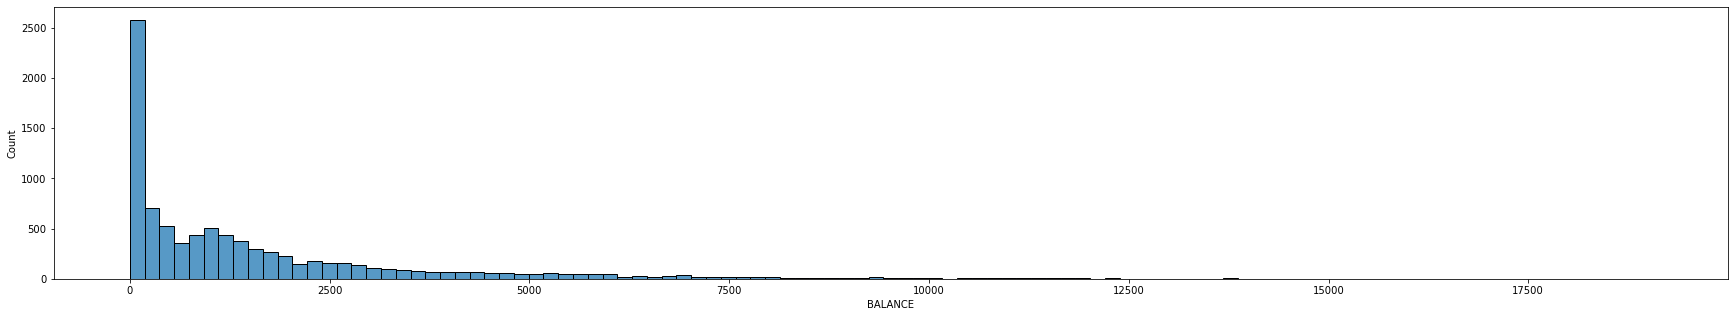

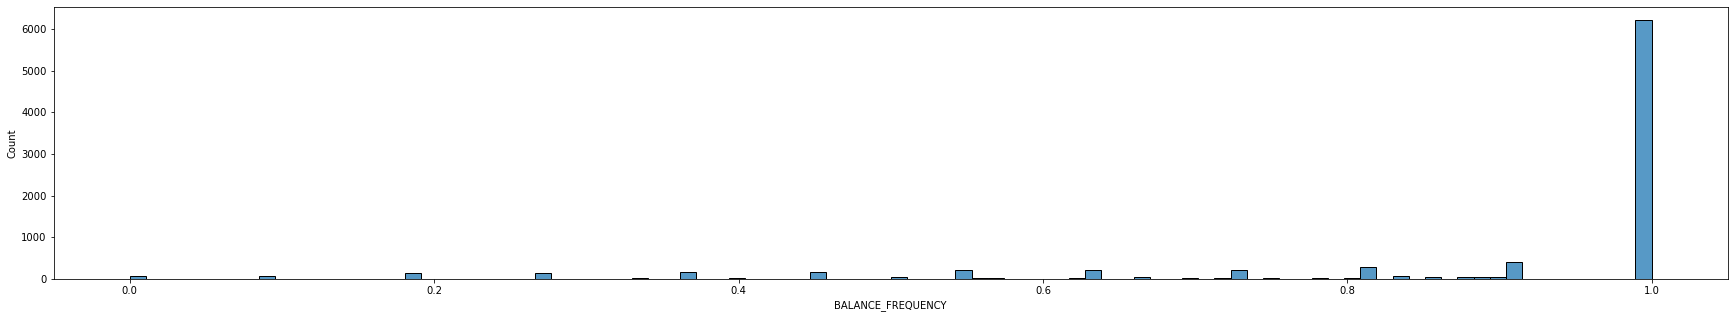

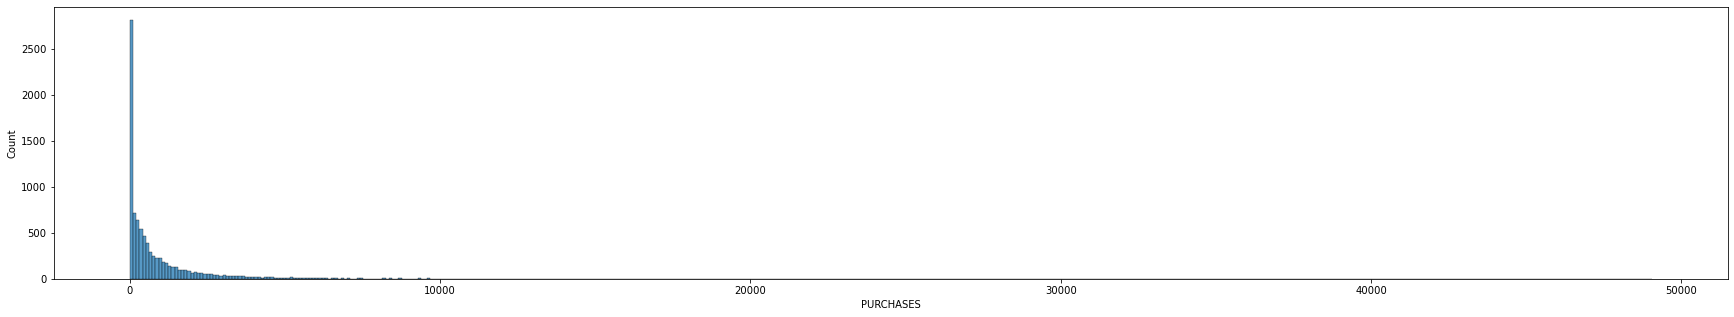

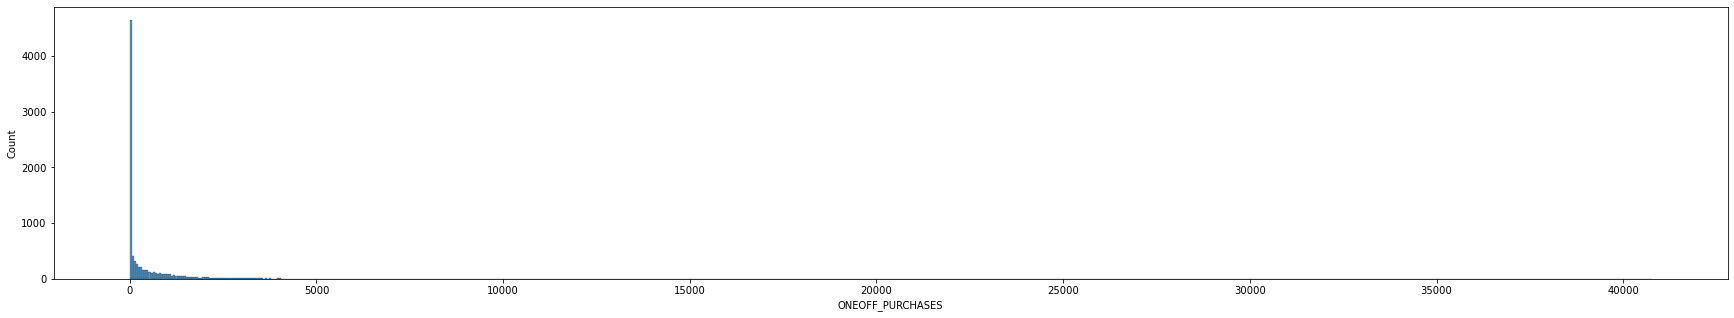

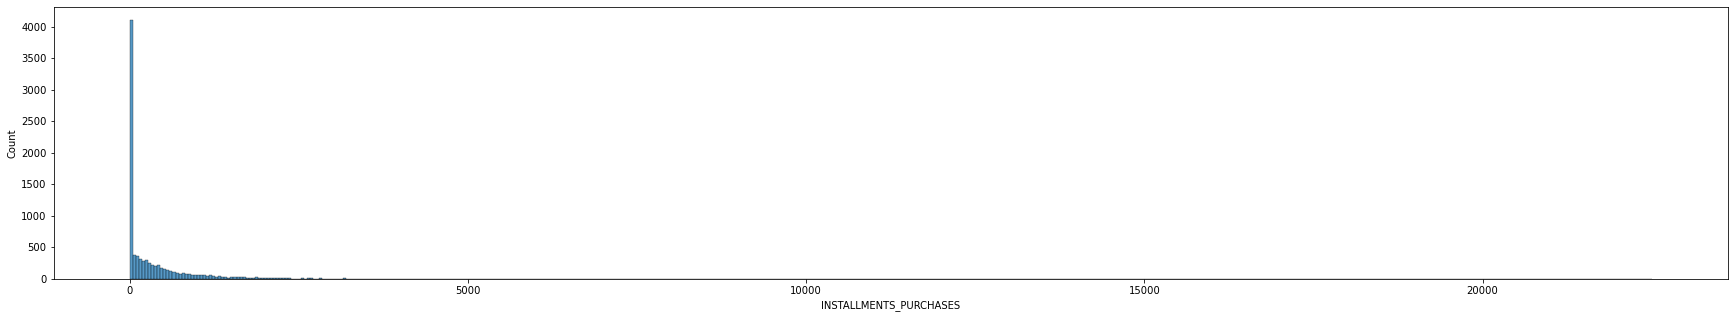

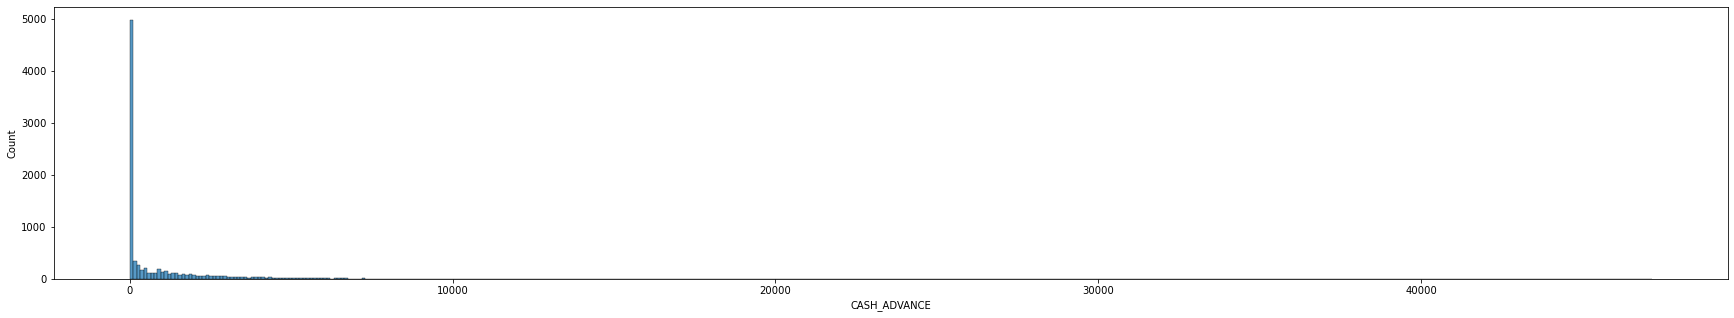

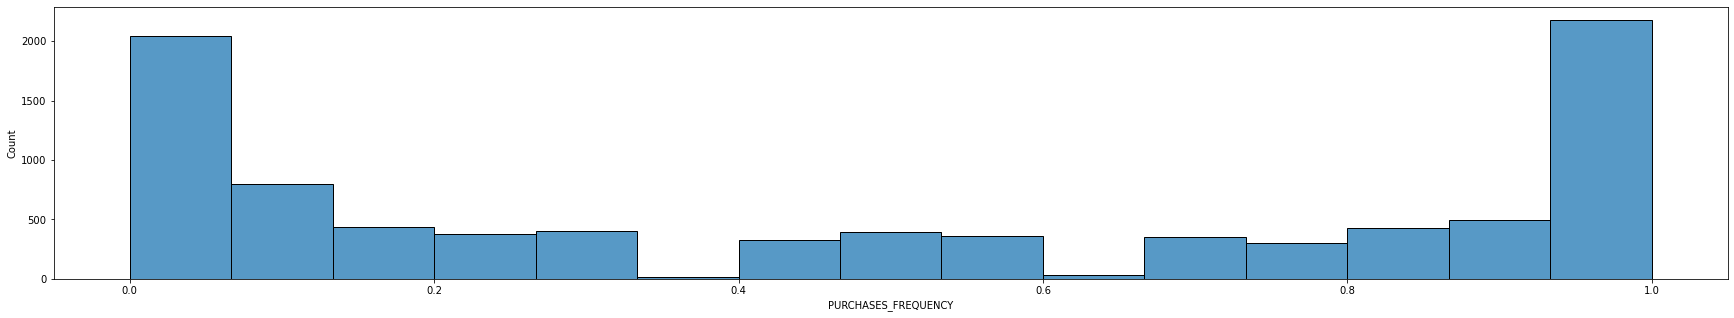

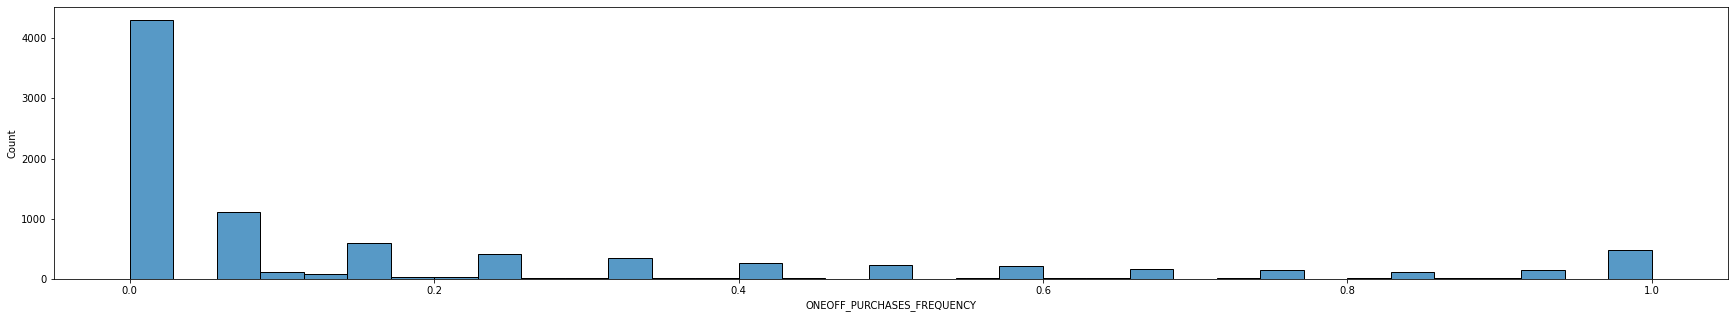

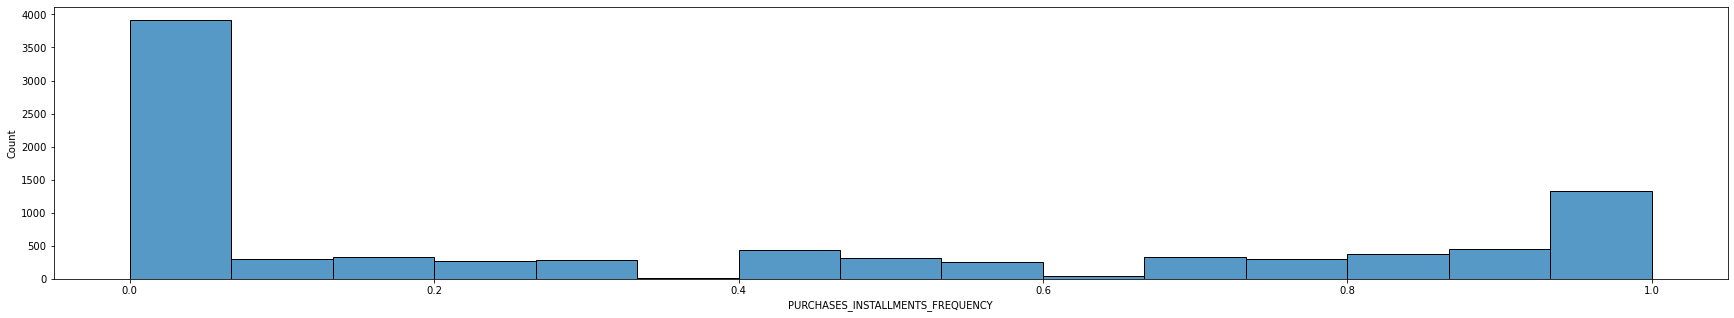

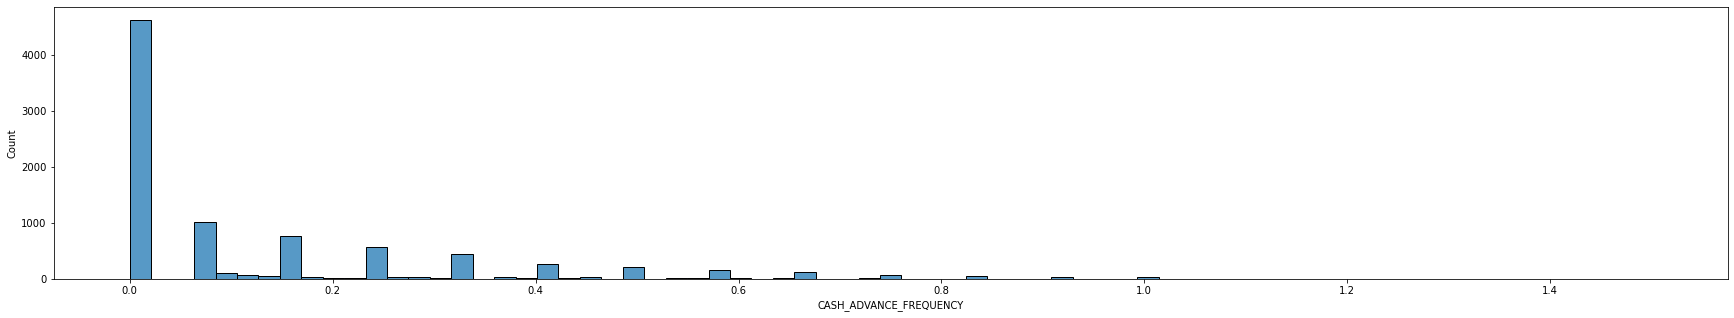

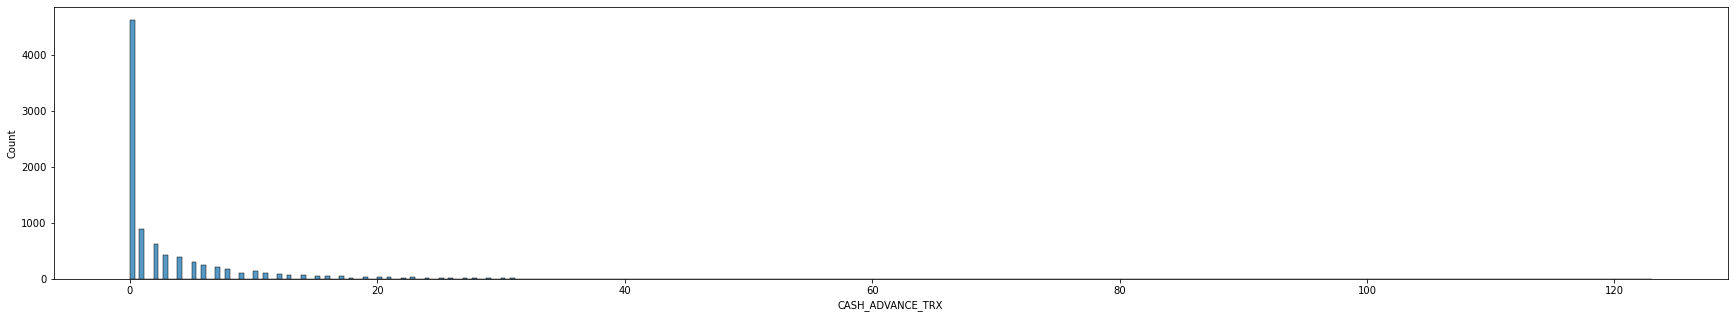

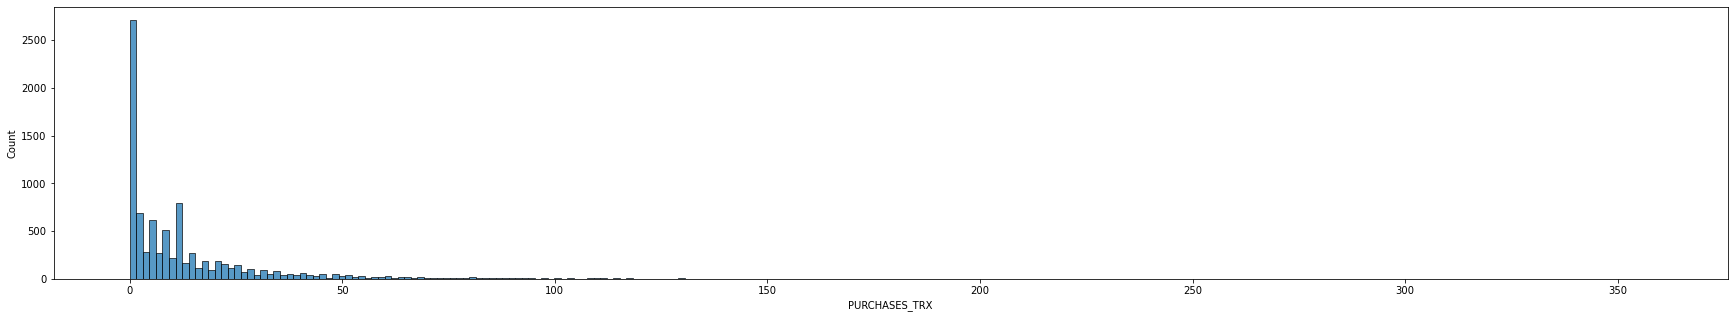

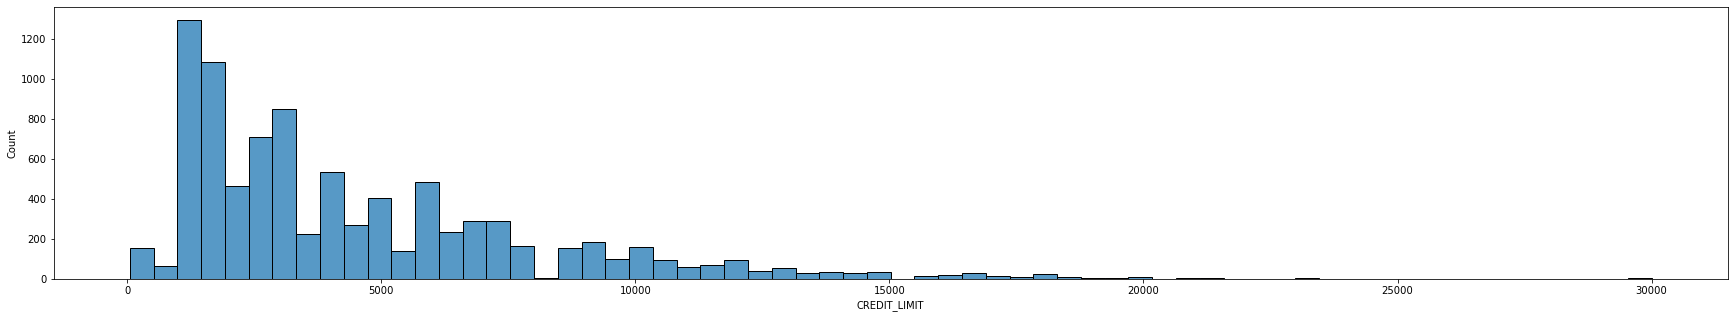

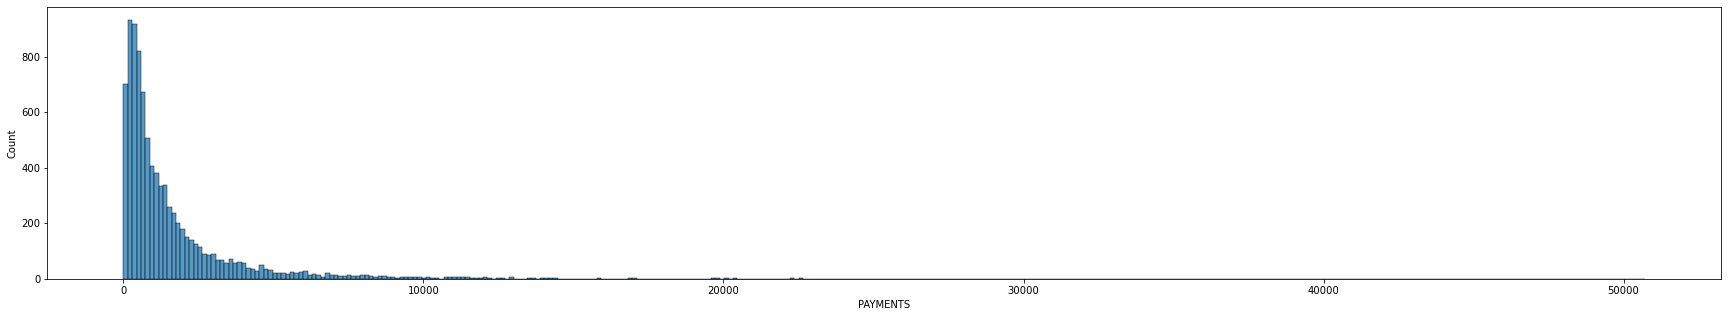

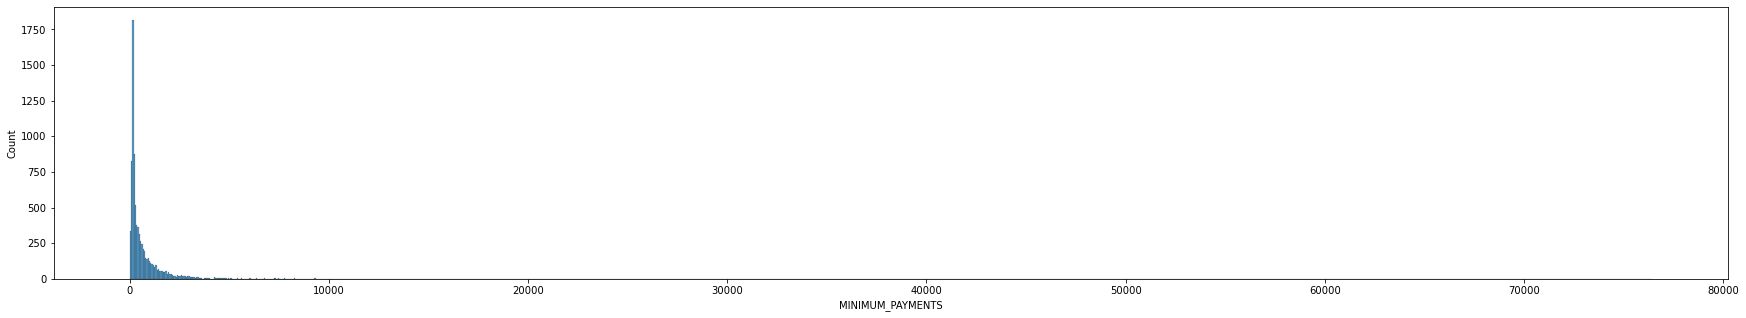

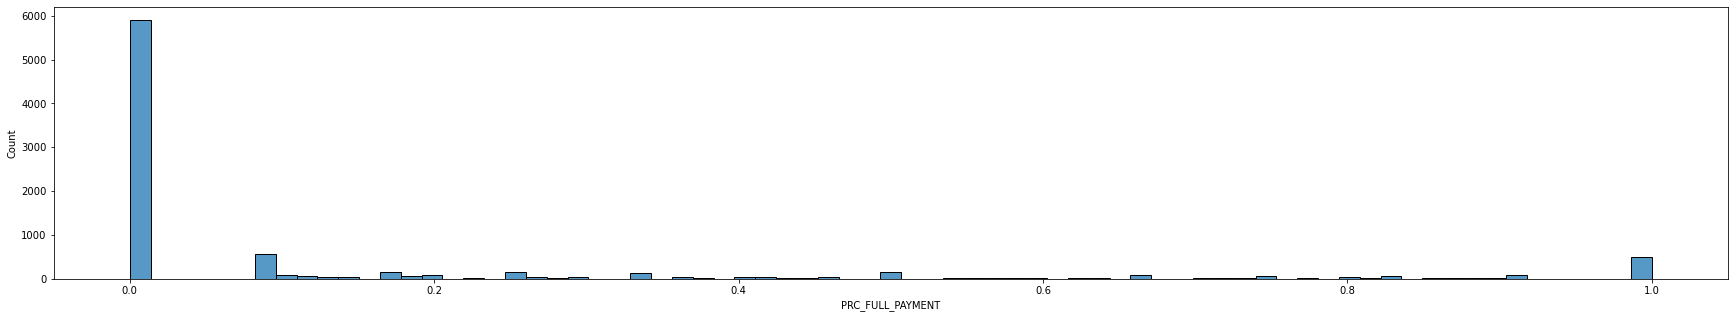

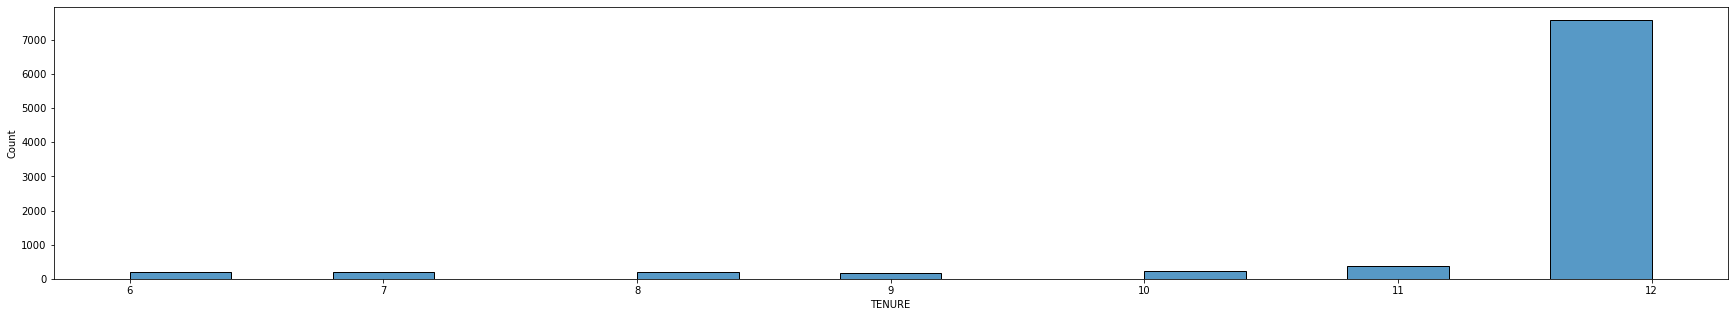

In [7]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(df[column])
    plt.show()

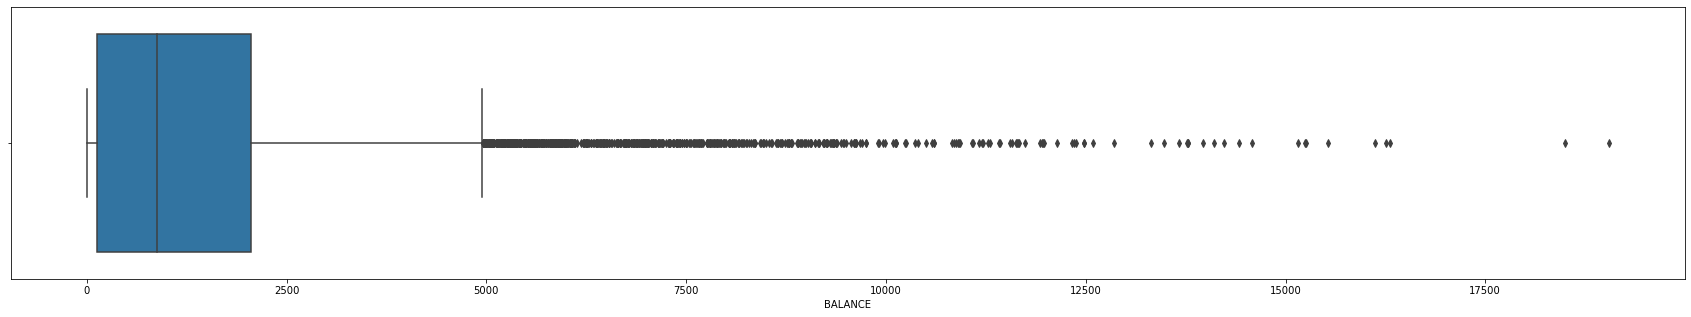

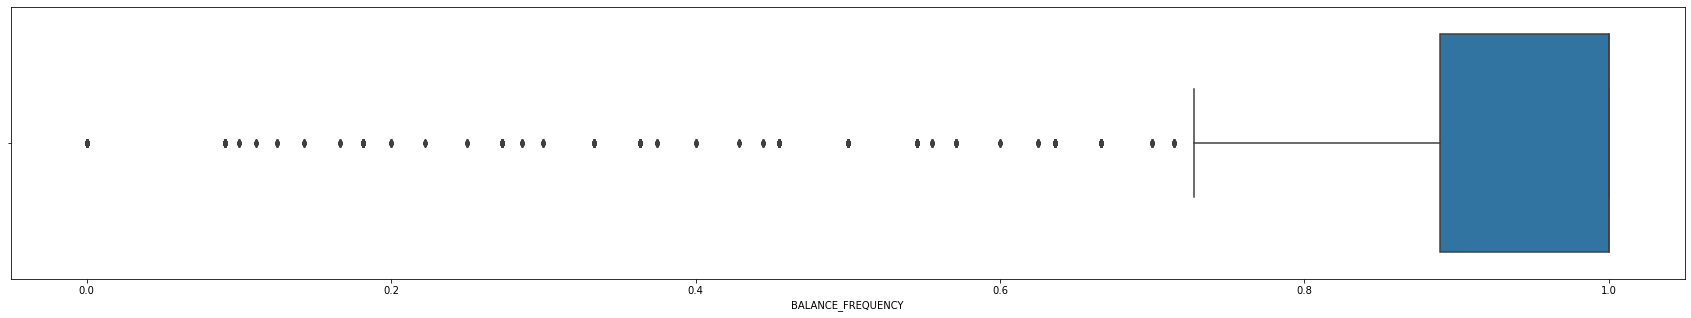

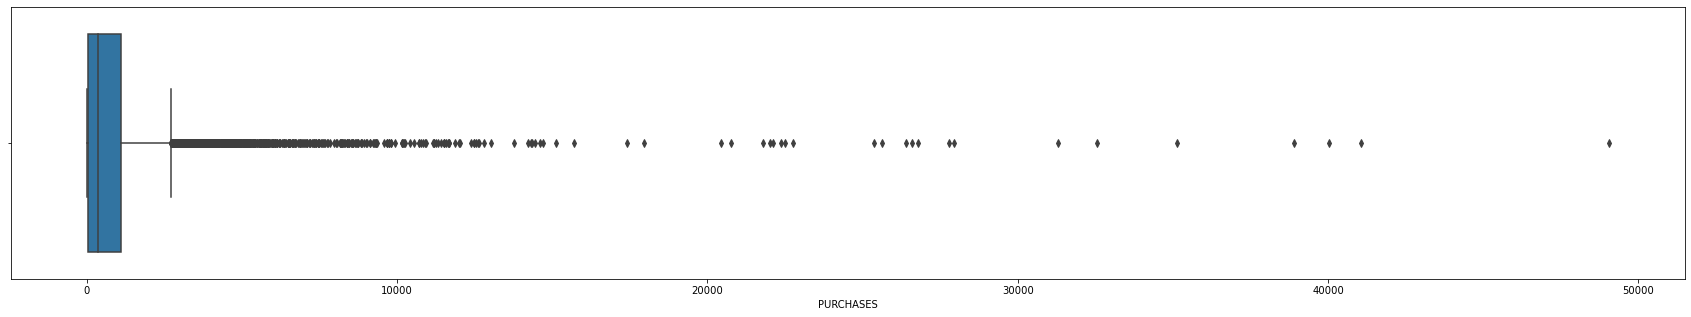

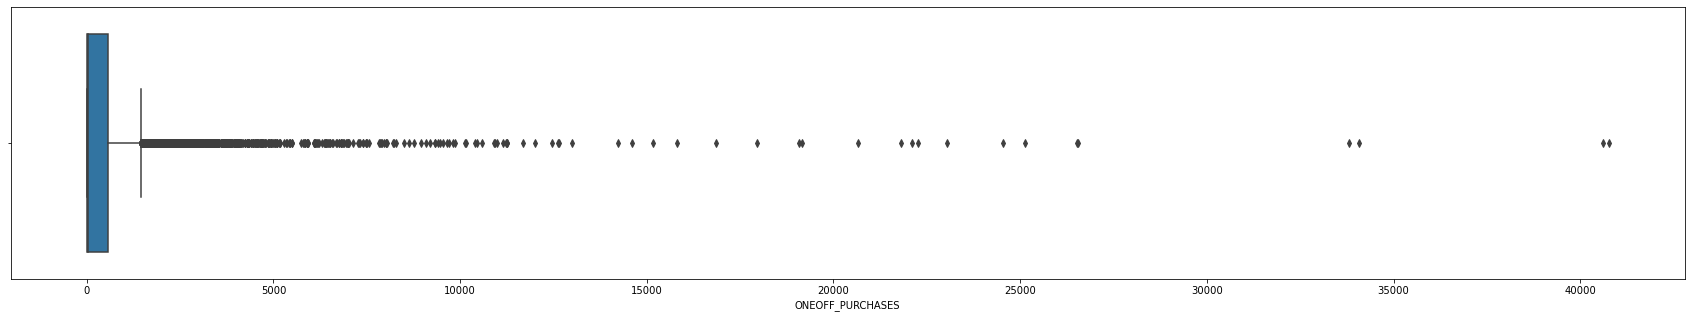

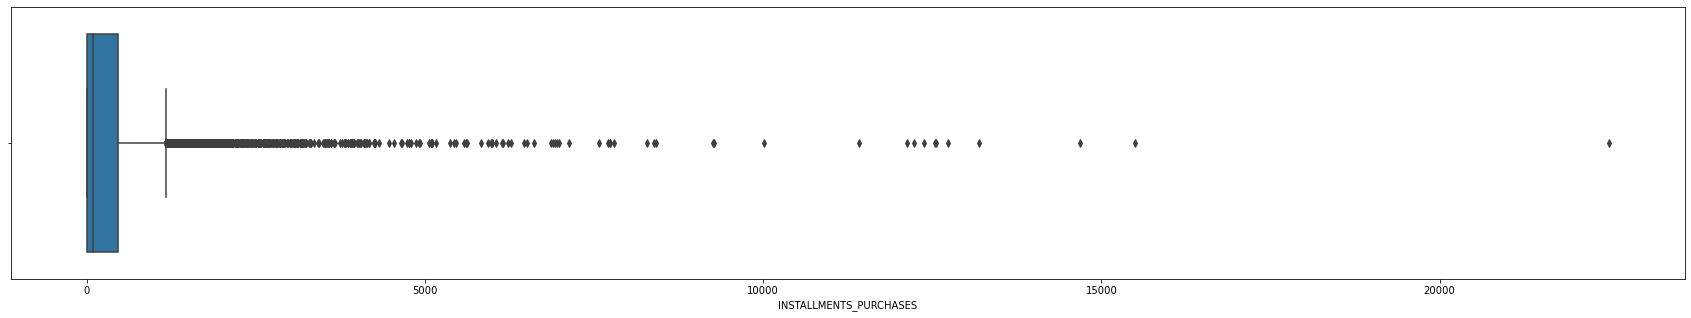

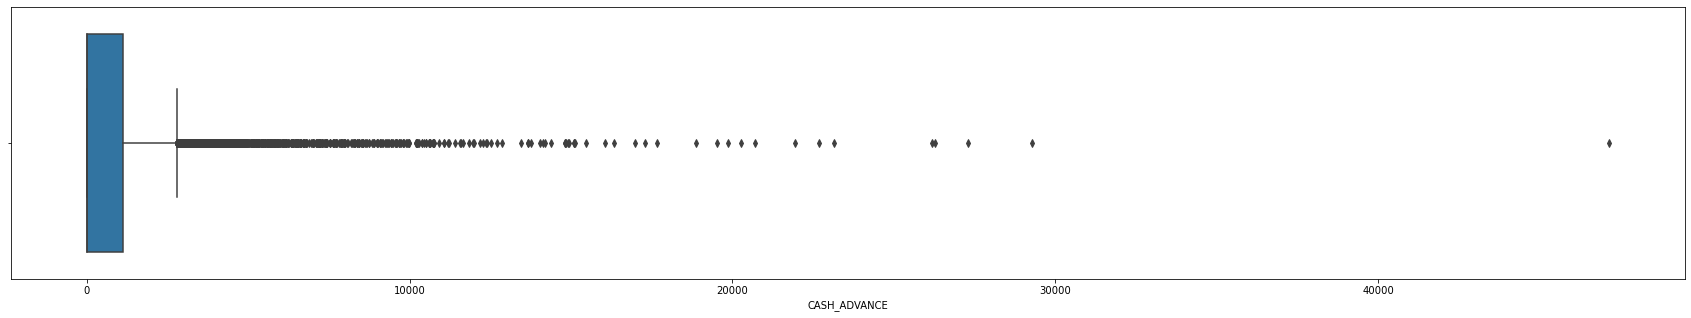

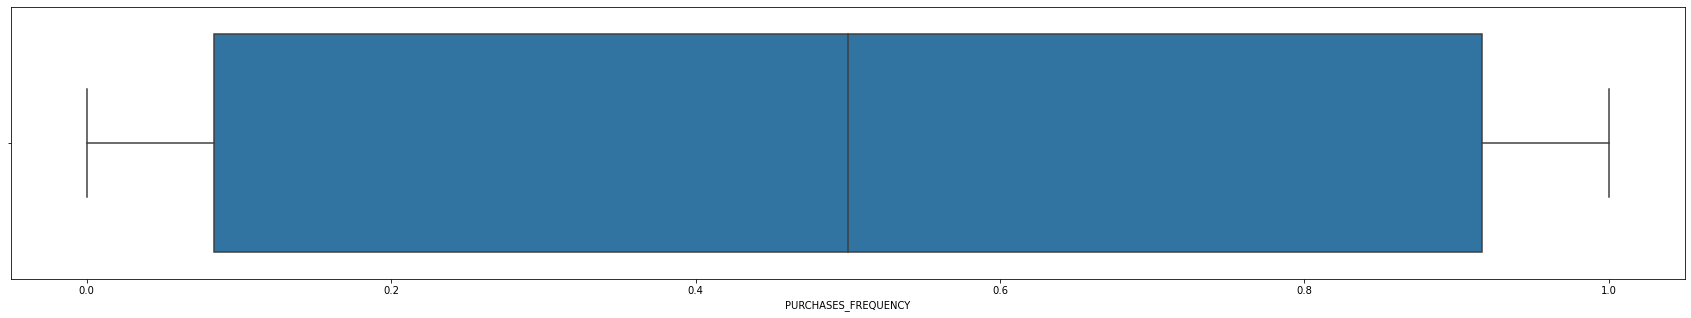

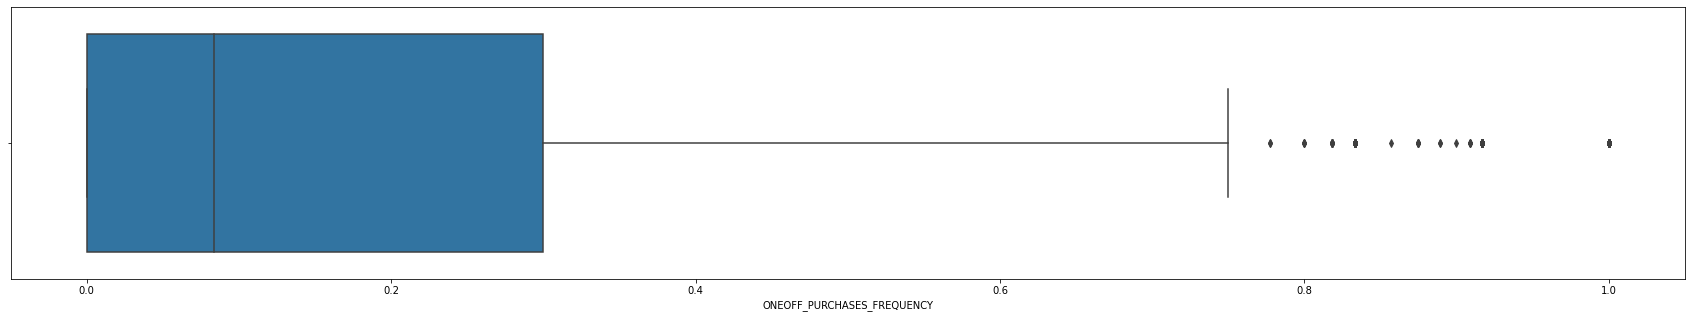

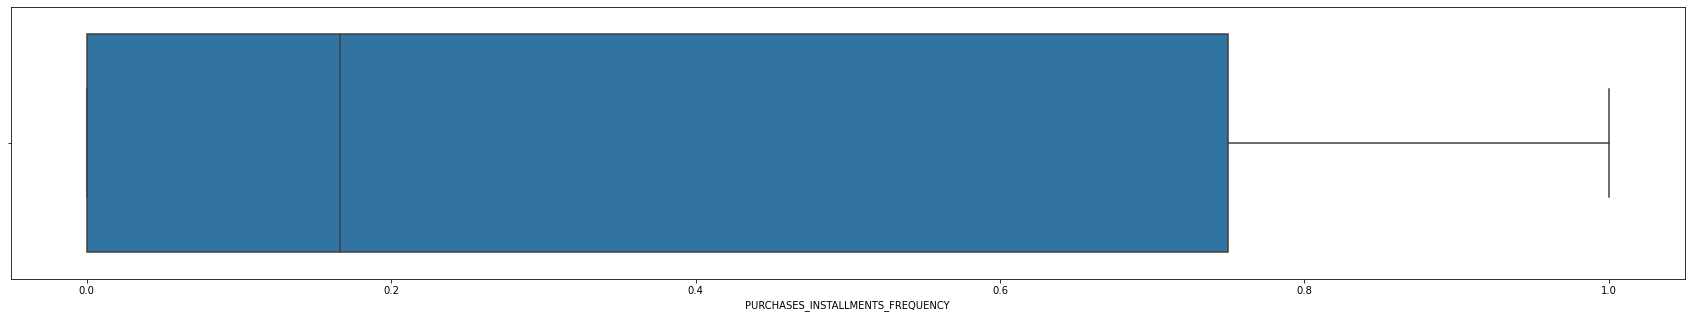

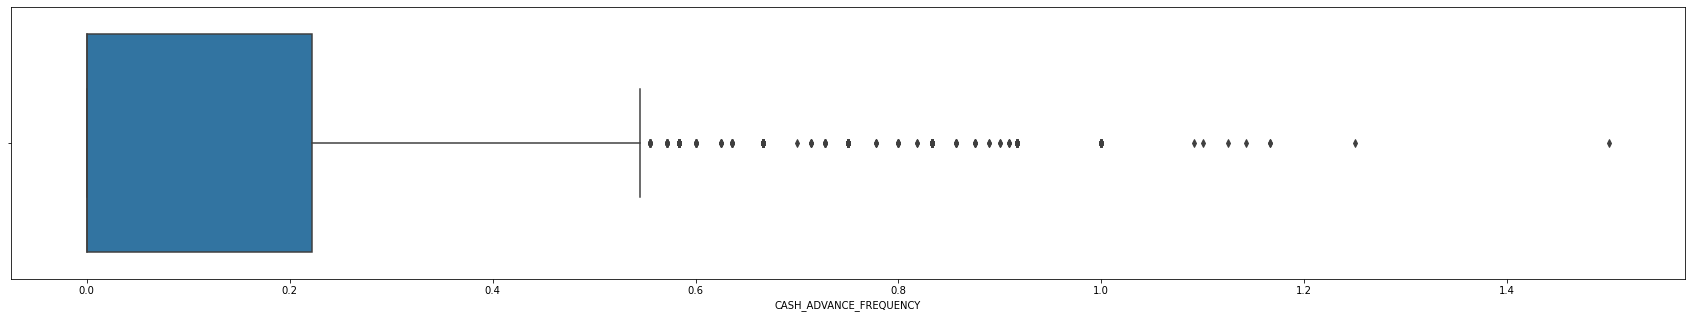

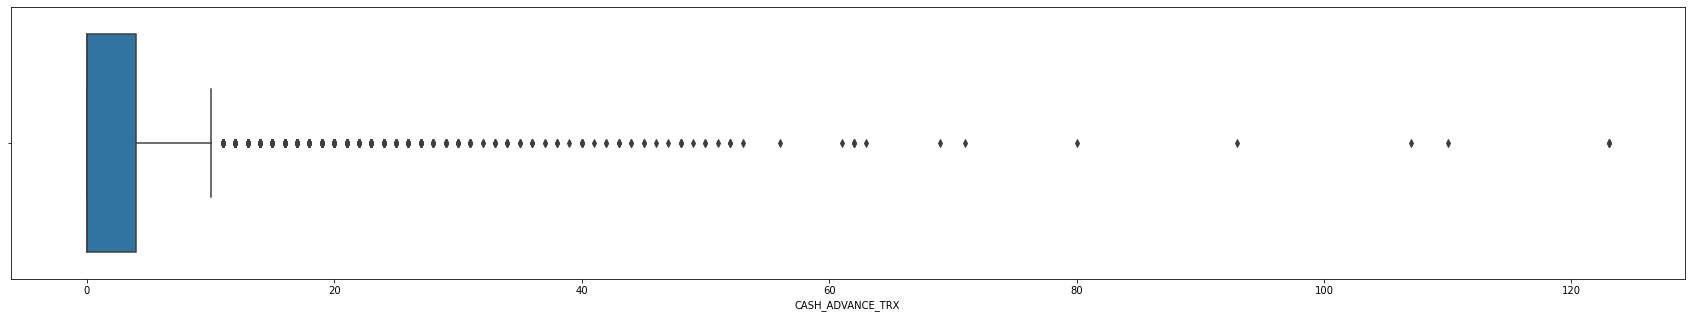

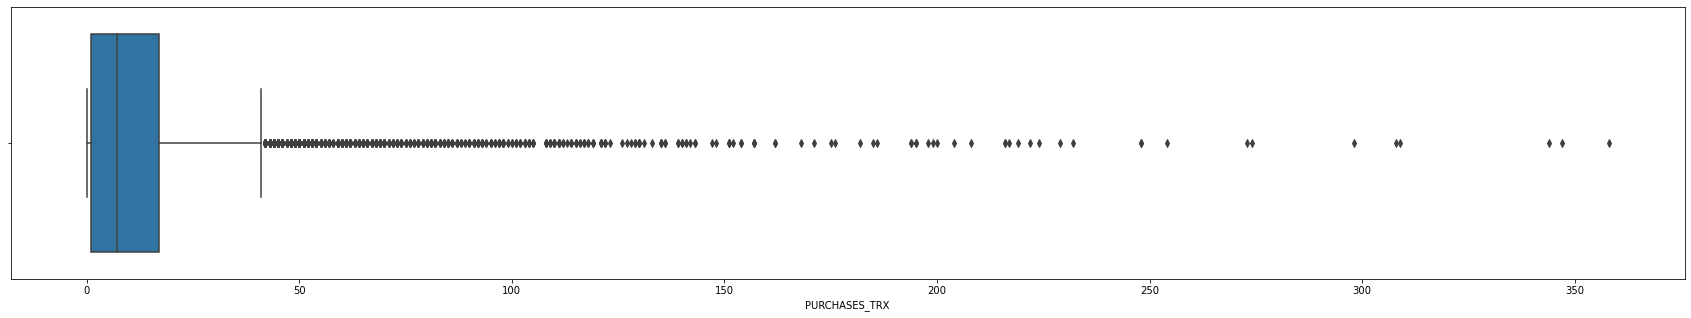

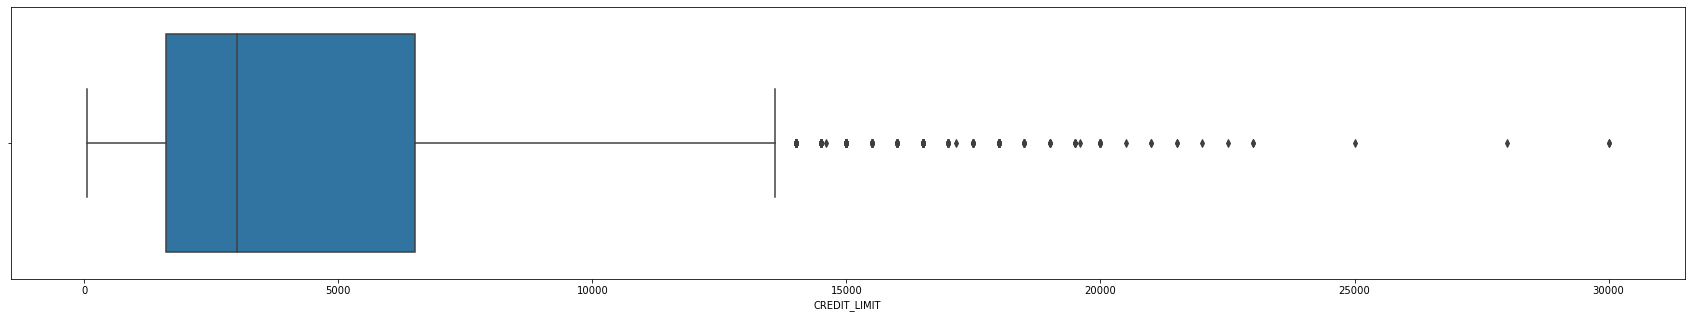

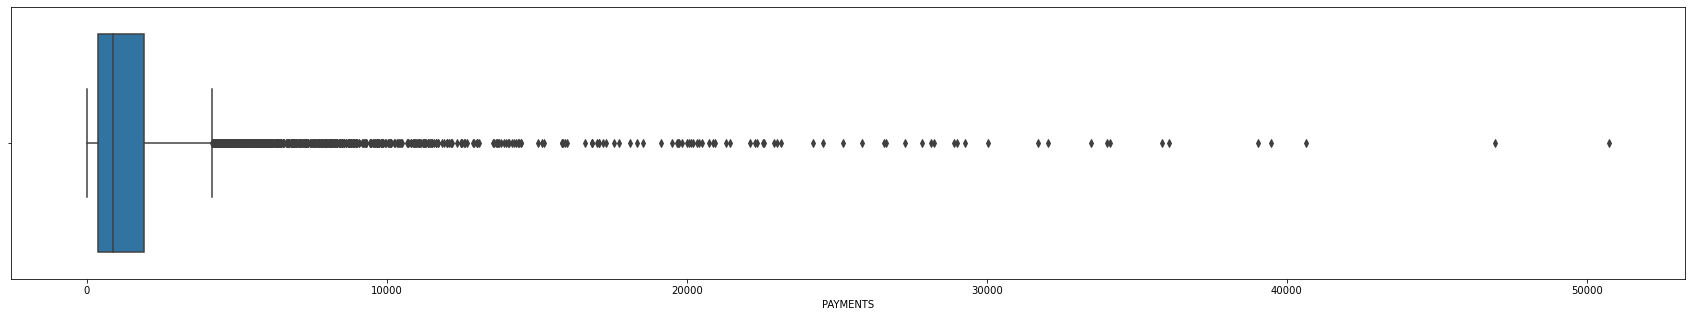

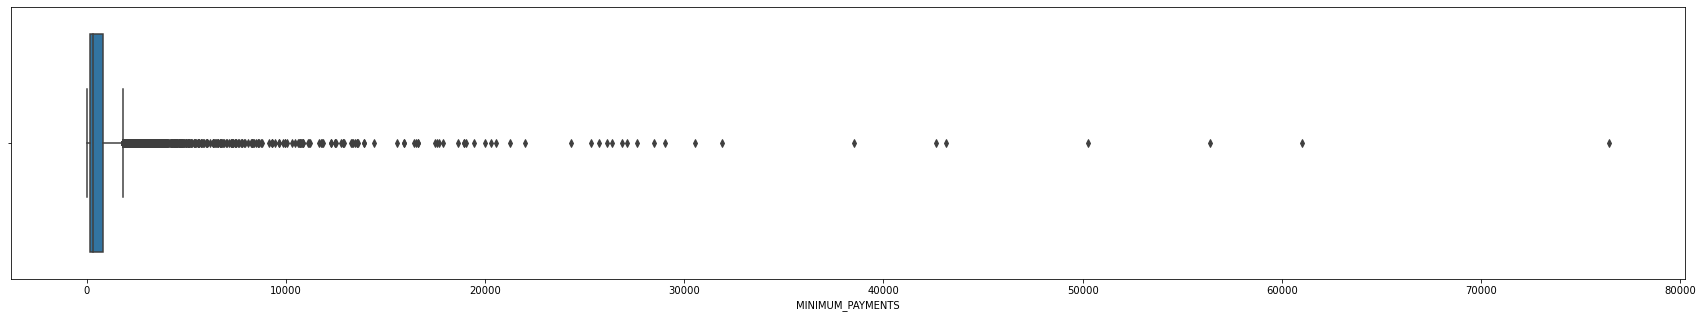

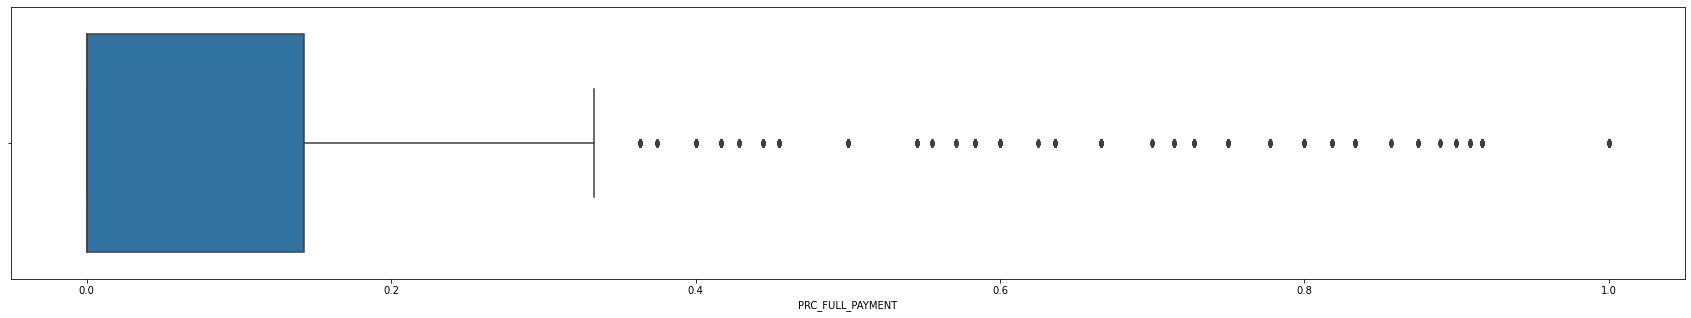

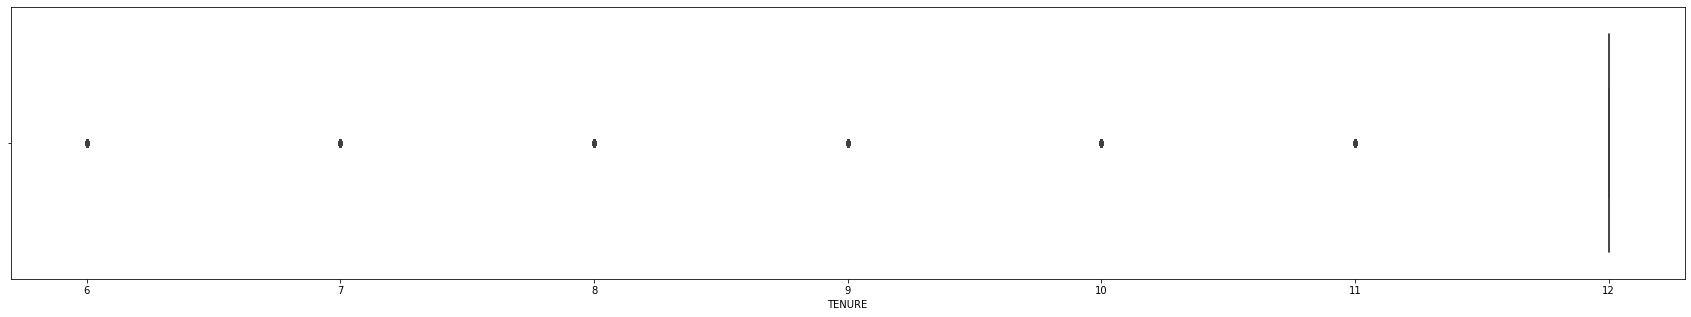

In [8]:
for column in df.columns:
    plt.figure(figsize = (30,5))
    sns.boxplot(df[column])
    plt.show()


In [9]:
 df.median()

BALANCE                              873.385231
BALANCE_FREQUENCY                      1.000000
PURCHASES                            361.280000
ONEOFF_PURCHASES                      38.000000
INSTALLMENTS_PURCHASES                89.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.500000
ONEOFF_PURCHASES_FREQUENCY             0.083333
PURCHASES_INSTALLMENTS_FREQUENCY       0.166667
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          7.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                             856.901546
MINIMUM_PAYMENTS                     312.343947
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
dtype: float64

In [10]:
df=df.fillna( df.median())

In [11]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
colomName=df.columns
print(colomName)
features=df[colomName]
df[colomName] = scaler.fit_transform(features.values)
df


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.002148           0.818182   0.001945          0.000000   
1     0.168169           0.909091   0.000000          0.000000   
2     0.131026           1.000000   0.015766          0.018968   
3     0.087521           0.636364   0.030567          0.036775   
4     0.042940           1.000000   0.000326          0.000393   
...        ...                ...        ...               ...   
8945  0.001496           1.000000   0.005936          0.000000   
8946  0.001007           1.000000   0.006118          0.000000   
8947  0.001229           0.833333   0.002945          0.000000   
8948  0.000707           0.833333   0.000000          0.000000   
8949  0.019572           0.666667   0.022293          0.026821   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.004240      0.000000             0.166667   
1                   0.000000      0.136685             0.000000   
2                   0.000000      0.000000             1.000000   
3                   0.000000      0.004366             0.083333   
4                   0.000000      0.000000             0.083333   
...                      ...           ...                  ...   
8945                0.012939      0.000000             1.000000   
8946                0.013333      0.000000             1.000000   
8947                0.006418      0.000000             0.833333   
8948                0.000000      0.000776             0.000000   
8949                0.000000      0.002695             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000           0.00000       0.005587      0.031720   
1                   0.166667           0.03252       0.000000      0.232053   
2                   0.000000           0.00000       0.033520      0.248748   
3                   0.055555           0.00813       0.002793      0.248748   
4                   0.000000           0.00000       0.002793      0.038397   
...                      ...               ...            ...           ...   
8945                0.000000           0.00000       0.016760      0.031720   
8946                0.000000           0.00000       0.016760      0.031720   
8947                0.000000           0.00000       0.013966      0.031720   
8948                0.111111           0.01626       0.000000      0.015025   
8949                0.222222           0.01626       0.064246      0.038397   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.003979          0.001826          0.000000     1.0  
1     0.080893          0.014034          0.222222     1.0  
2     0.012264          0.008210          0.000000     1.0  
3     0.000000          0.004088          0.000000     1.0  
4     0.013374          0.003204          0.000000     1.0  
...        ...               ...               ...     ...  
8945  0.006419          0.000640          0.500000     0.0  
8946  0.005439          0.004088          0.000000     0.0  
8947  0.001602          0.001078          0.250000     0.0  
8948  0.0

In [13]:
# from sklearn.preprocessing import PowerTransformer
# pt = PowerTransformer()
# train_df = pt.fit_transform(train_df)
# test_df = pt.transform(test_df)

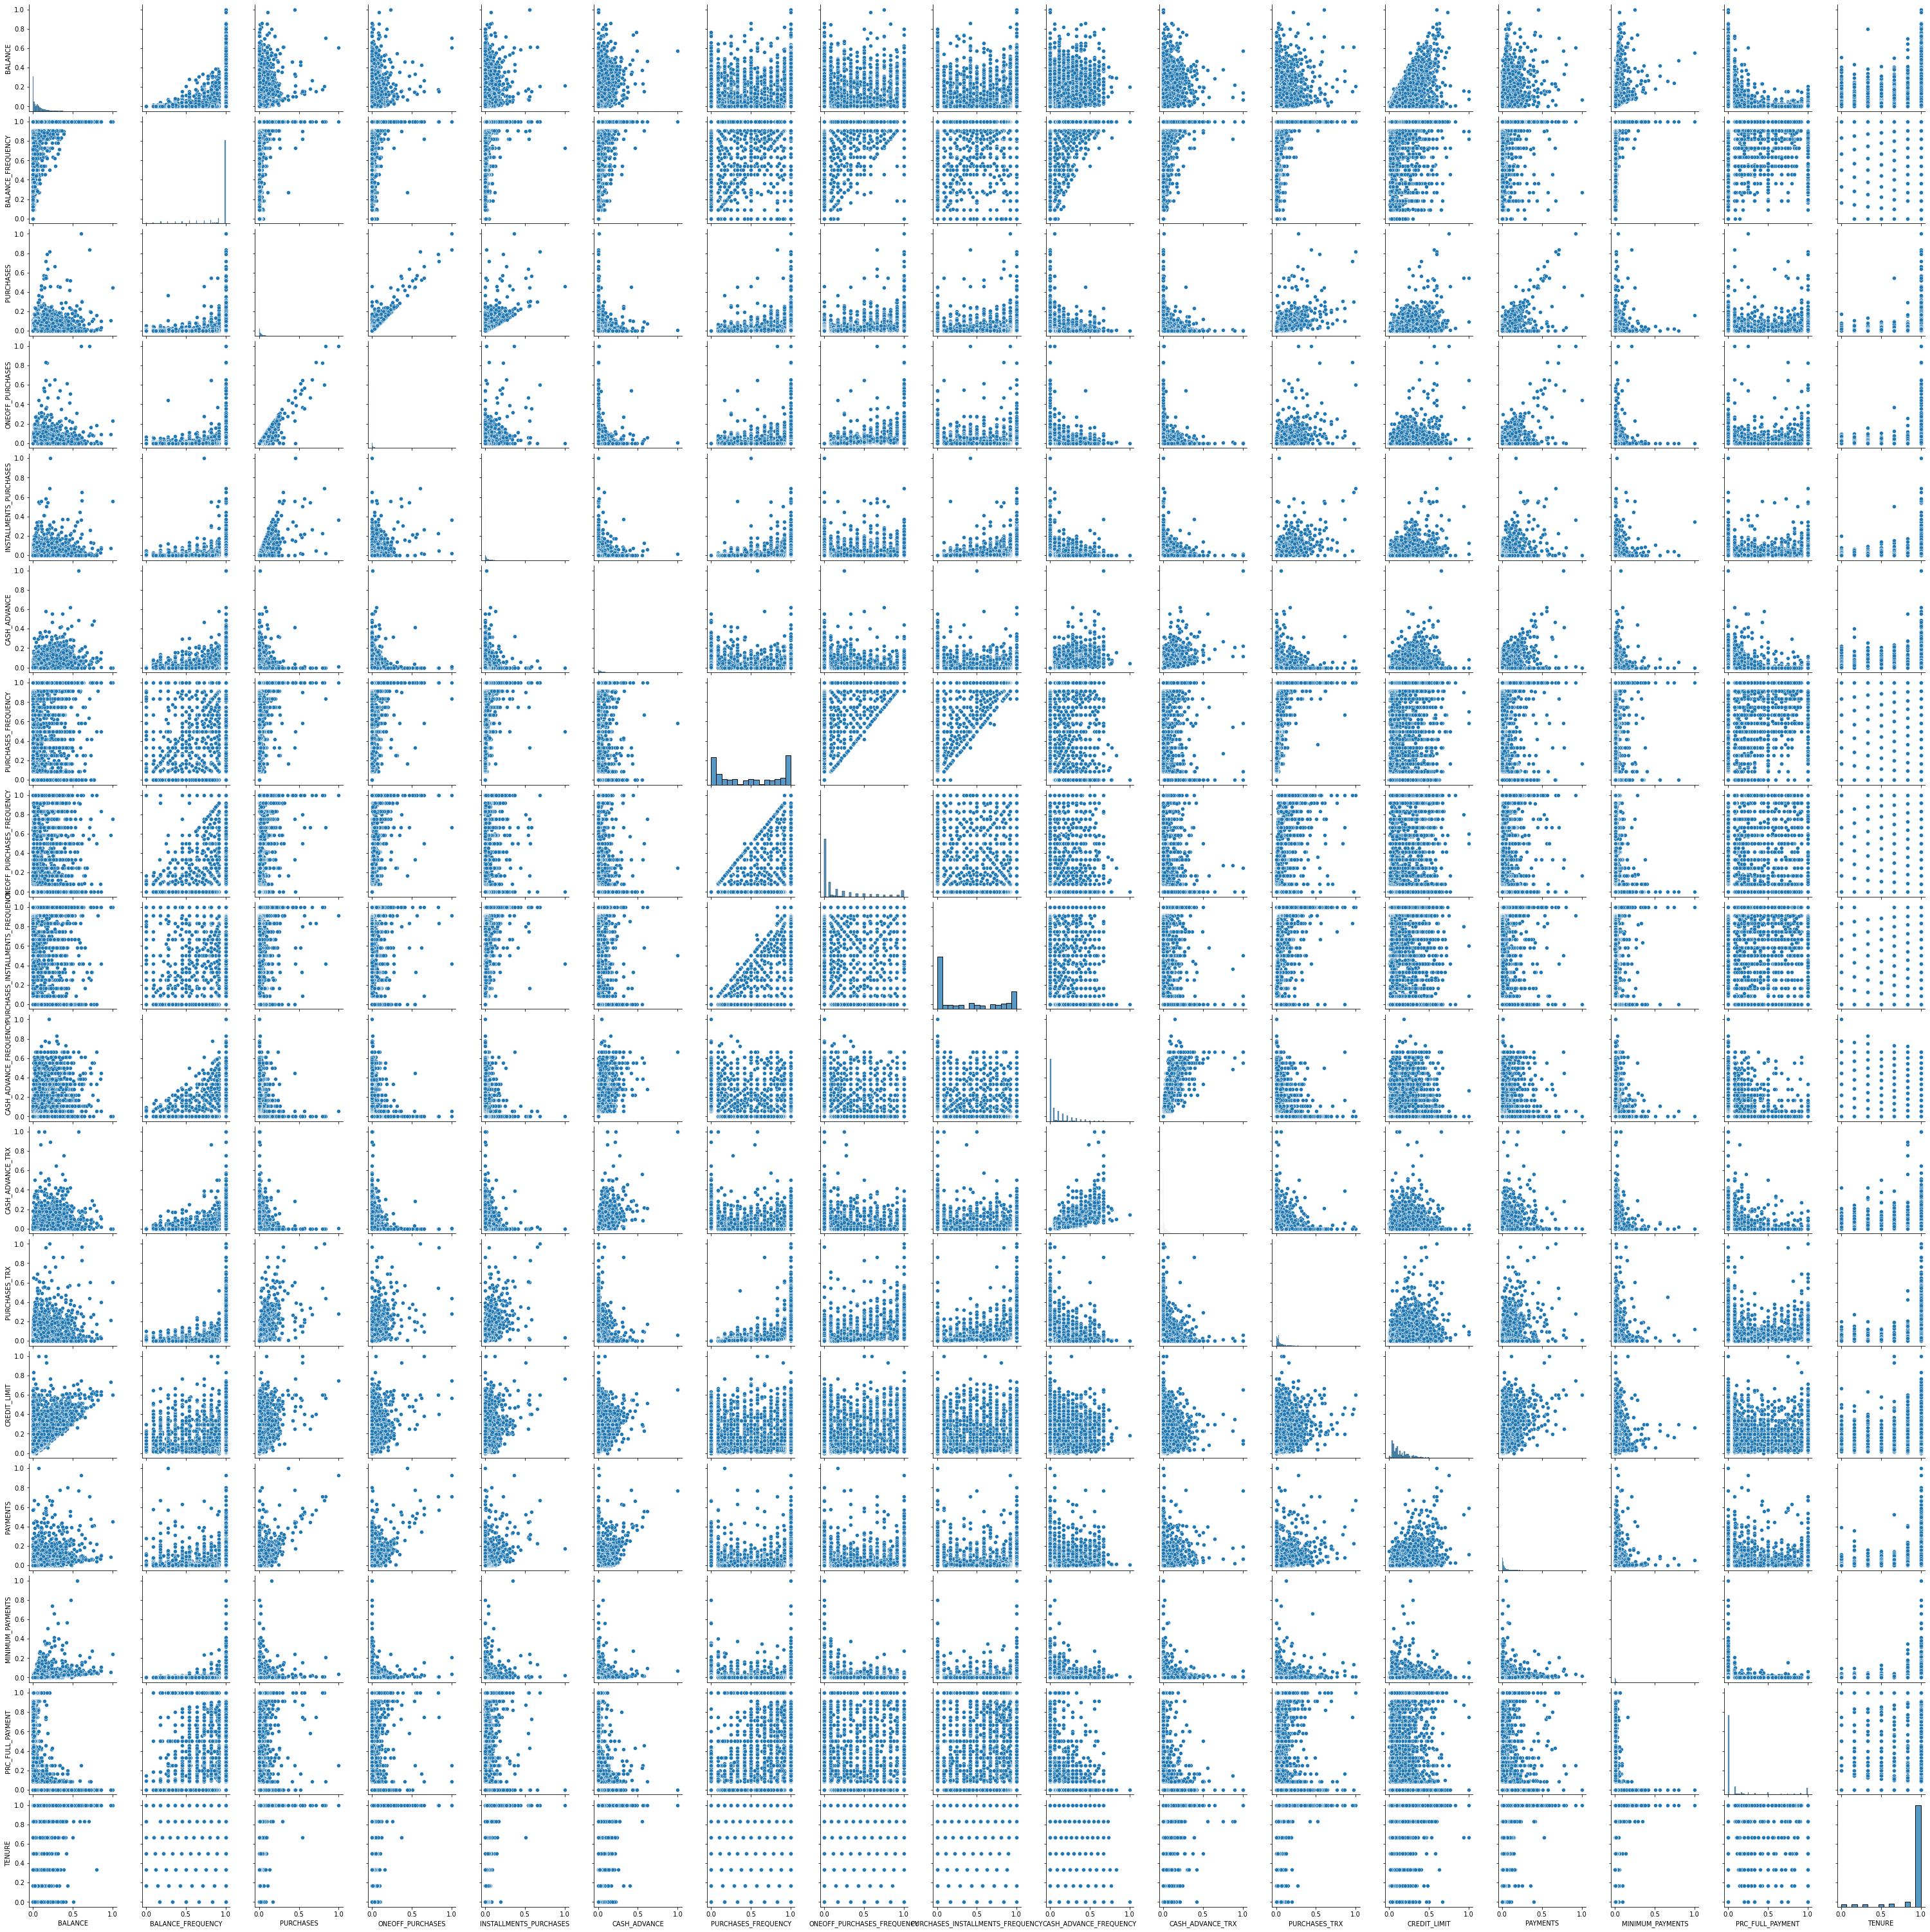

In [14]:
sns.pairplot(df)
plt.show()

Elbow Method to determine the number of clusters to be formed:


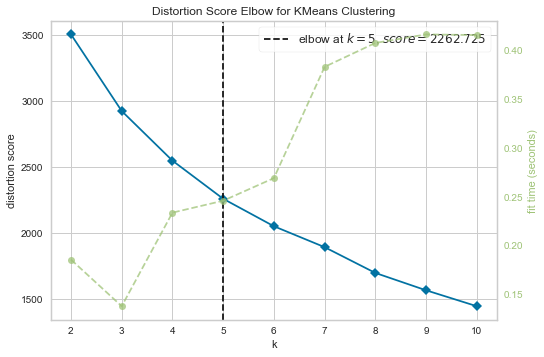

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [16]:
# pca= PCA()
# pca.fit(df)
# plt.plot(pca.explained_variance_ratio_.cumsum())
# pca= PCA(n_components=6)
# X= pca.fit_transform(df)

Elbow Method to determine the number of clusters to be formed number of pca: 2


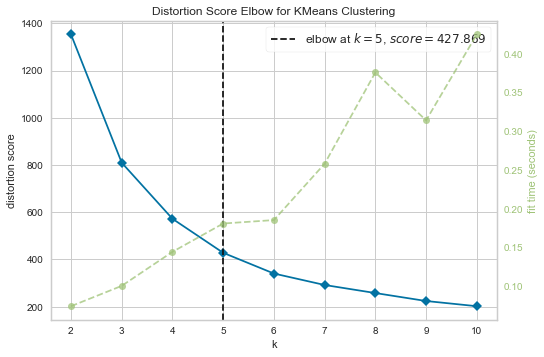

Elbow Method to determine the number of clusters to be formed number of pca: 3


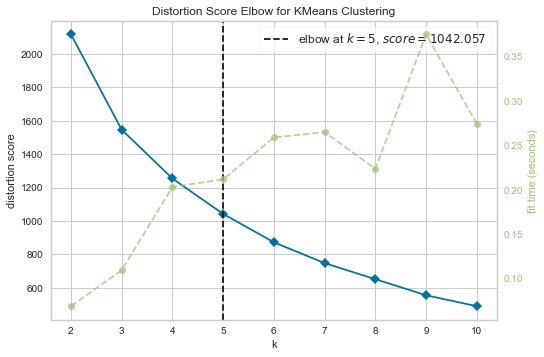

Elbow Method to determine the number of clusters to be formed number of pca: 4


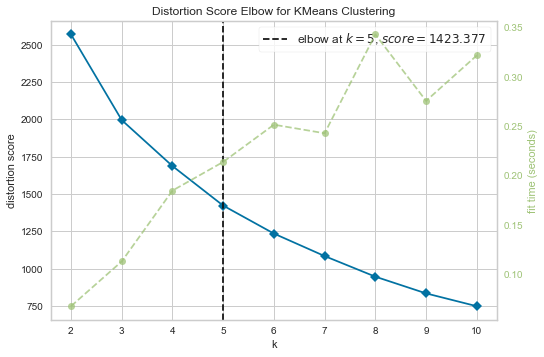

Elbow Method to determine the number of clusters to be formed number of pca: 5


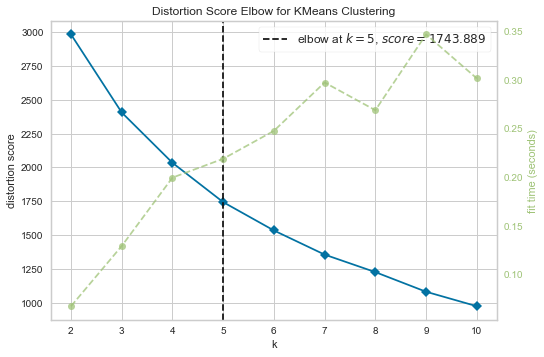

Elbow Method to determine the number of clusters to be formed number of pca: 6


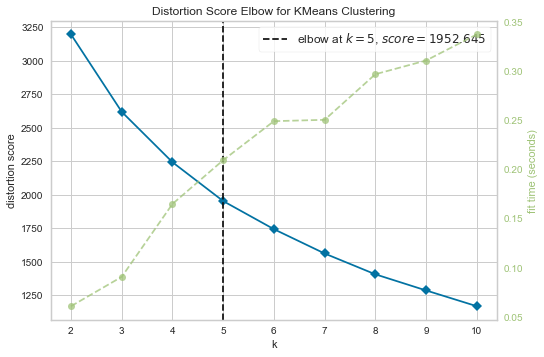

Elbow Method to determine the number of clusters to be formed number of pca: 7


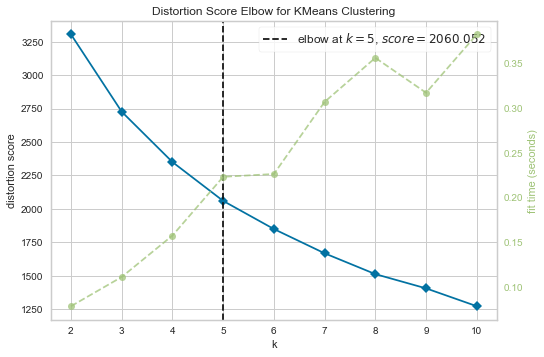

Elbow Method to determine the number of clusters to be formed number of pca: 8


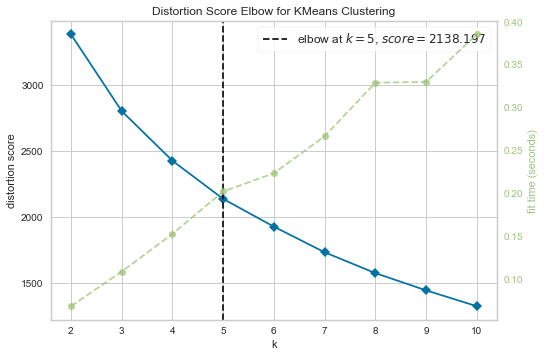

Elbow Method to determine the number of clusters to be formed number of pca: 9


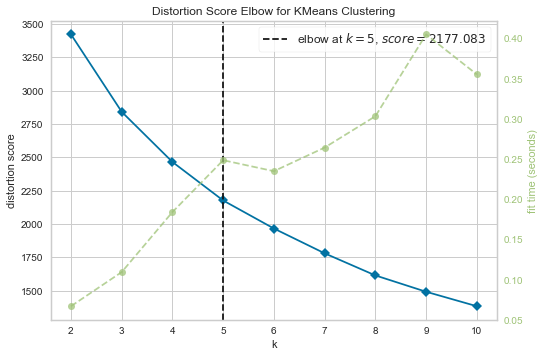

Elbow Method to determine the number of clusters to be formed number of pca: 10


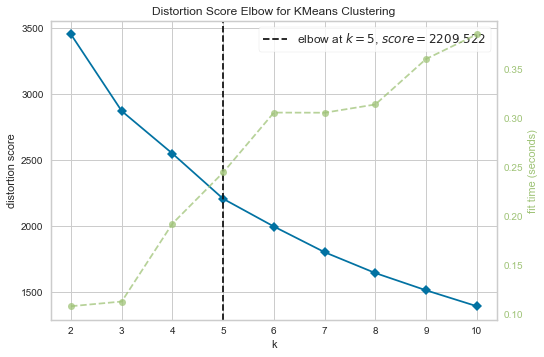

Elbow Method to determine the number of clusters to be formed number of pca: 11


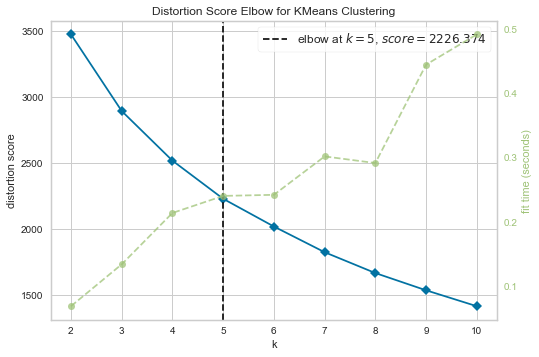

Elbow Method to determine the number of clusters to be formed number of pca: 12


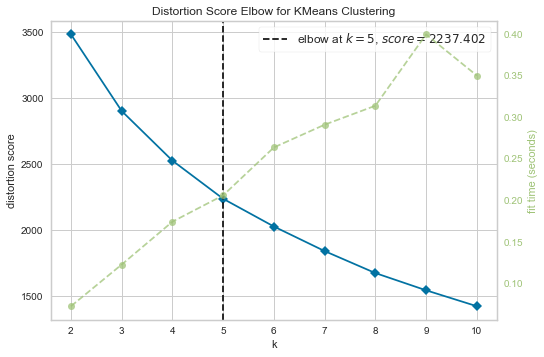

Elbow Method to determine the number of clusters to be formed number of pca: 13


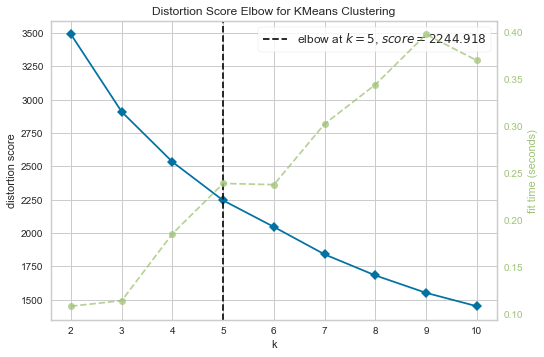

Elbow Method to determine the number of clusters to be formed number of pca: 14


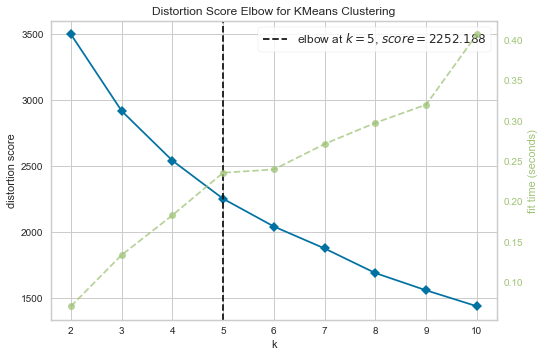

[0.5511796118965318, 0.4299588601793397, 0.3852021145473482, 0.3831072248542132, 0.3513560528447453, 0.33633026140274863, 0.3307253479275175, 0.32670036667020536, 0.3240553388830821, 0.32258869358140163, 0.32164874617090816, 0.32096759783759665, 0.32029746394413006]
0


In [17]:
from sklearn.metrics import silhouette_score

listsilhouette_score=[]
for i in range(2,np.shape(df)[1]-2):
    pca= PCA(n_components=i)
    X= pca.fit_transform(df)
    print('Elbow Method to determine the number of clusters to be formed number of pca:',i)
    Elbow_M = KElbowVisualizer(KMeans(), k=10)
    Elbow_M.fit(X)
    Elbow_M.show()
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    listsilhouette_score.append( silhouette_score(X, kmeans.labels_) )
print(listsilhouette_score)
print(np.argmax(listsilhouette_score))


### 

In [18]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df)
principal_comp

array([[-0.48216769, -0.09765264],
       [-0.60857495, -0.01937583],
       [ 0.30450847,  0.92093391],
       ...,
       [ 0.36038344, -0.42268649],
       [-0.64610006, -0.20439151],
       [-0.0946022 ,  0.39951371]])

In [19]:
pca_df = pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -0.482168 -0.097653
1 -0.608575 -0.019376
2  0.304508  0.920934
3 -0.588622 -0.005631
4 -0.554357  0.052978

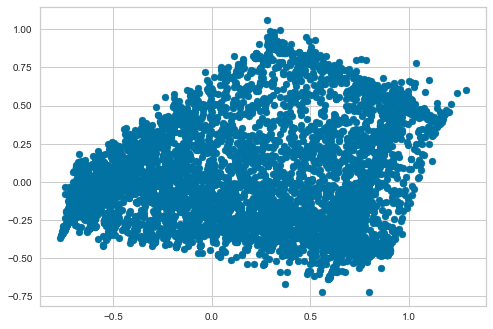

In [21]:
plt.scatter(pca_df.pca1, pca_df.pca2)

Dbscan:Estimated clusters for eps= 0.12 and min_samples= 5 that silhouette_avg =  0.3003759133014986


kmean: number of cluster is: 5 and the silhouette_avg is:  0.5511746395984805

AgglomerativeClustering_Hierarchical number of k is : 2 and silhouette_avg:  0.5703360929917662


gmm: number of cluster is: 2 and the silhouette_avg is:  0.41893936822121497




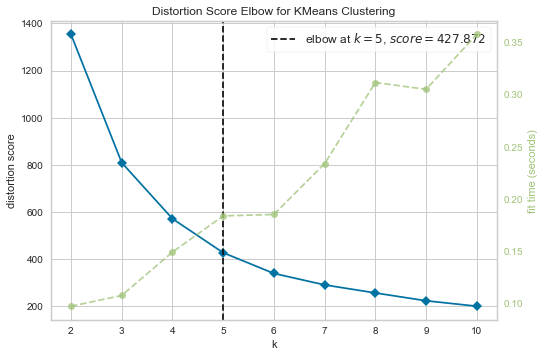

0.5511746395984805


In [20]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)
print(silhouette_score(pca_df, kmeans.labels_) )





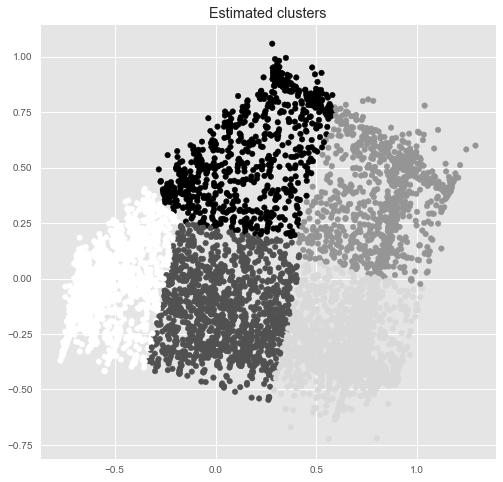

In [51]:

# #######
fig = plt.figure(figsize=(18, 8))
fig.tight_layout()
s1 = plt.subplot(1, 2, 1)
s1.set_title("Estimated clusters")
s1.scatter(pca_df.pca1, pca_df.pca2, c = kmeans.labels_, s = 30)
# s1.scatter(cluster_centers[:, 0], cluster_centers[:,1], c = "r", s = 35)

number of k is : 2 and silhouette_avg:  0.5703360929917662
number of k is : 3 and silhouette_avg:  0.5495729702555338
number of k is : 4 and silhouette_avg:  0.4575294017509655
number of k is : 5 and silhouette_avg:  0.4502333477713902
number of k is : 6 and silhouette_avg:  0.4321251085450999
number of k is : 7 and silhouette_avg:  0.4623925125291787
number of k is : 8 and silhouette_avg:  0.4687838362680669
number of k is : 9 and silhouette_avg:  0.47870351592024085


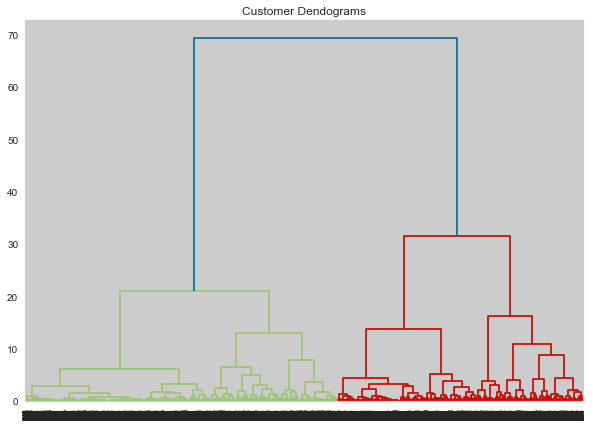

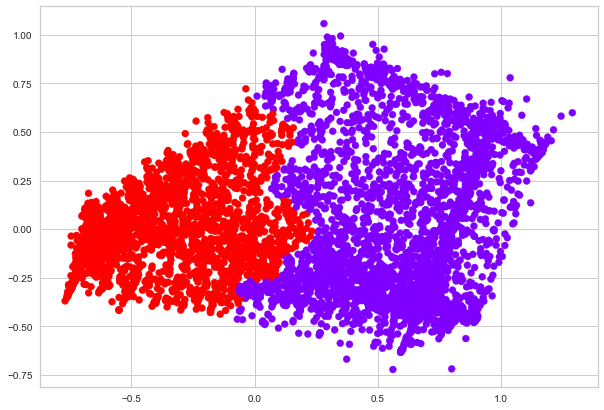

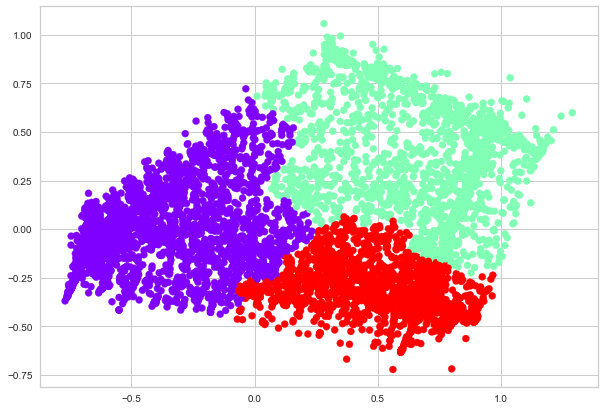

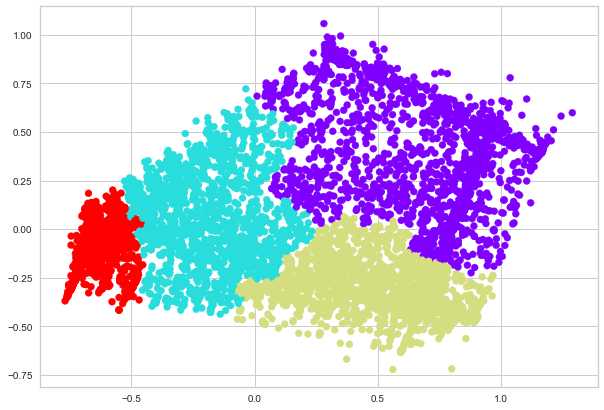

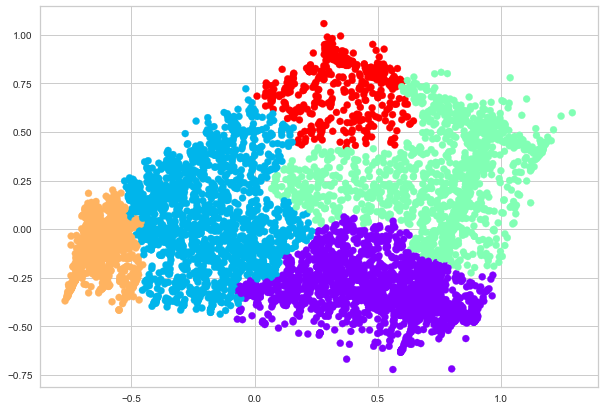

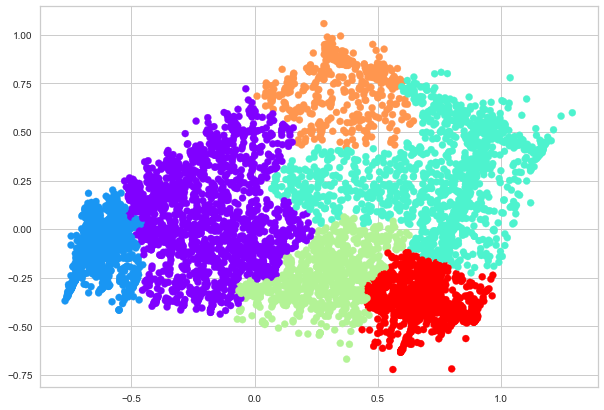

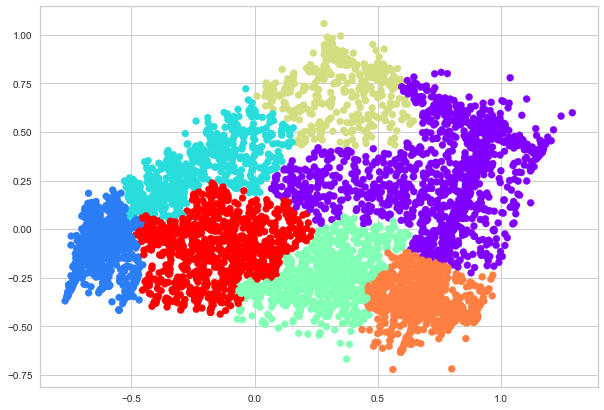

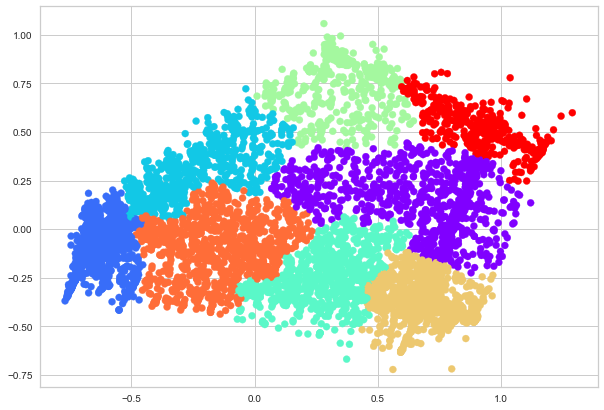

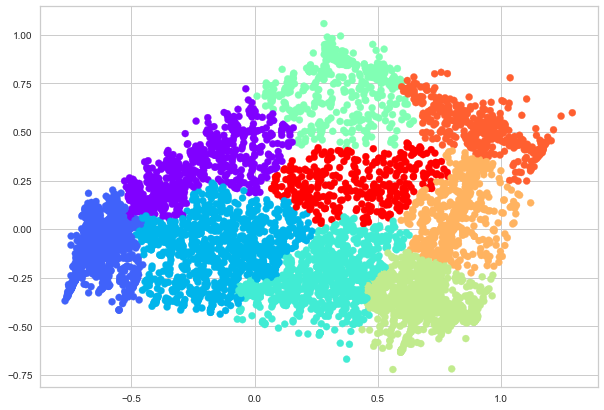

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering_Hierarchical(X):
    list_silhouette_avg=[]
    plt.figure(figsize=(10, 7))
    plt.title("Customer Dendograms")
    dend = shc.dendrogram(shc.linkage(X, method='ward'))
    for i in range(2,10):
        cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
        cluster.fit_predict(X)
        plt.figure(figsize=(10, 7))
        plt.scatter(X.pca1, X.pca2, c=cluster.labels_, cmap='rainbow')
        
        silhouette_avg = silhouette_score(X, cluster.labels_)
        print("number of k is :",i,"and silhouette_avg: " ,silhouette_avg)
AgglomerativeClustering_Hierarchical(pca_df)

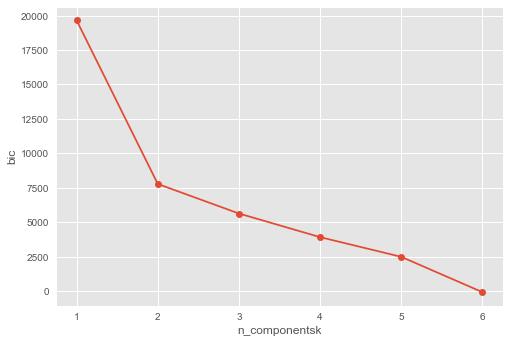

number of cluster is: 2 and the silhouette_avg is:  0.41893936822121497
number of cluster is: 3 and the silhouette_avg is:  0.399436571971352


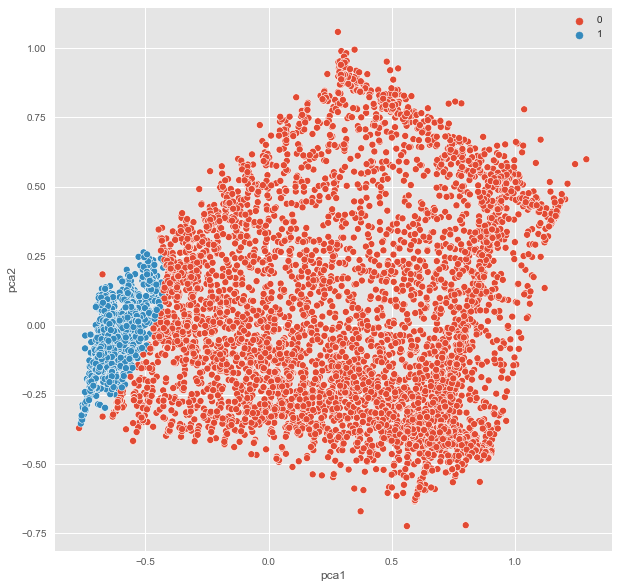

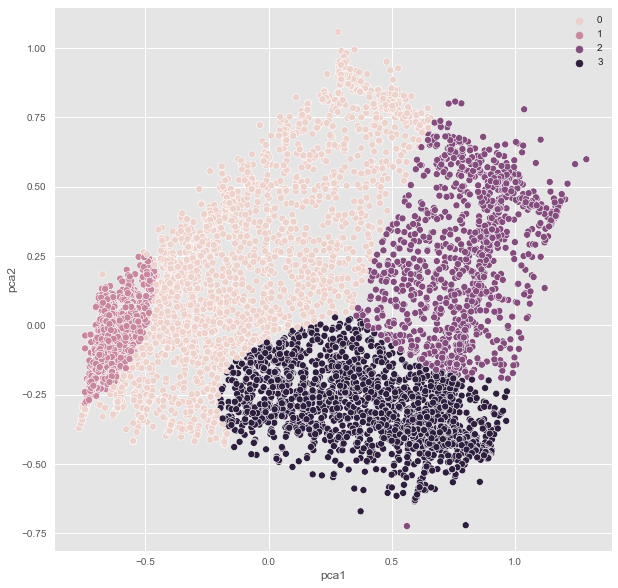

In [53]:
from sklearn.mixture import GaussianMixture
def GMM_c(X):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", random_state=0)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
    plt.plot(n_components_range, bic, marker = "o")
    plt.xlabel("n_componentsk")
    plt.ylabel("bic")
    plt.show()
    
GMM_c(pca_df)

gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=0)
gmm.fit(pca_df)
gmmlabel=gmm.predict(pca_df)
silhouette_avg= silhouette_score(pca_df, gmmlabel)
print("number of cluster is:",2,"and the silhouette_avg is: ",silhouette_avg)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = gmmlabel, data = pca_df)

#######################################################
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=0)
gmm.fit(pca_df)
gmmlabel=gmm.predict(pca_df)
silhouette_avg= silhouette_score(pca_df, gmmlabel)
print("number of cluster is:",3,"and the silhouette_avg is: ",silhouette_avg)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = gmmlabel, data = pca_df)


[0 0 0 ... 0 0 0]
Estimated clusters for eps= 0.12 and min_samples= 5 that silhouette_avg =  0.3003759133014986


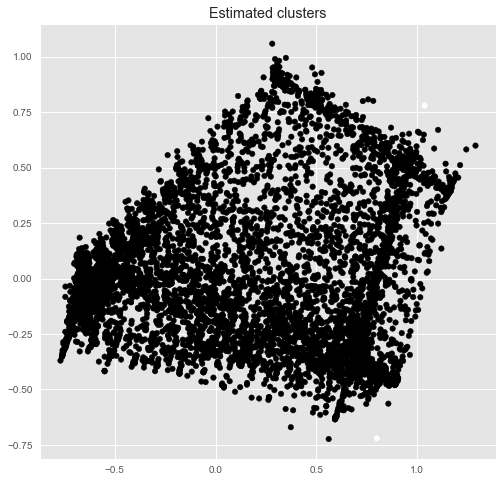

In [43]:
from sklearn.cluster import DBSCAN
def db_SCAN(X):
    epsilon=0.12
    min_samples=5
    loopSearch=[]
    dbscan = DBSCAN(eps=epsilon, metric='euclidean', min_samples=min_samples)
    dbscan.fit(X)
    print(dbscan.labels_)
    silhouette_avg= silhouette_score(X, dbscan.labels_)
    loopSearch.append([epsilon,min_samples,silhouette_avg,dbscan.labels_])
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout()
    print("Estimated clusters for eps=",epsilon,"and min_samples=",min_samples,"that silhouette_avg = ",silhouette_avg)
    s1 = plt.subplot(1, 2, 1)
    s1.set_title("Estimated clusters")
    s1.scatter(X.pca1, X.pca2, c = dbscan.labels_, s = 30)



db_SCAN(pca_df)

[0 0 0 ... 0 0 0]
Estimated clusters for eps= 0.12 and min_samples= 15 that silhouette_avg =  0.3003759133014986


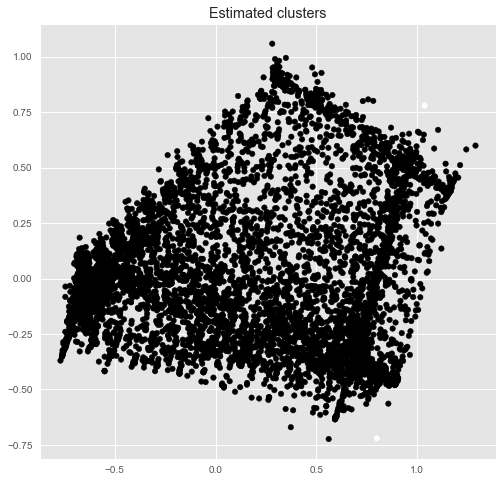

In [47]:
from sklearn.cluster import DBSCAN
def db_SCAN(X):
    epsilon=0.12
    min_samples=15
    loopSearch=[]
    dbscan = DBSCAN(eps=epsilon, metric='euclidean', min_samples=min_samples)
    dbscan.fit(X)
    print(dbscan.labels_)
    silhouette_avg= silhouette_score(X, dbscan.labels_)
    loopSearch.append([epsilon,min_samples,silhouette_avg,dbscan.labels_])
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout()
    print("Estimated clusters for eps=",epsilon,"and min_samples=",min_samples,"that silhouette_avg = ",silhouette_avg)
    s1 = plt.subplot(1, 2, 1)
    s1.set_title("Estimated clusters")
    s1.scatter(X.pca1, X.pca2, c = dbscan.labels_, s = 30)



db_SCAN(pca_df)

[0 0 0 ... 0 0 0]
Estimated clusters for eps= 0.16 and min_samples= 15 that silhouette_avg =  0.22090528654425529


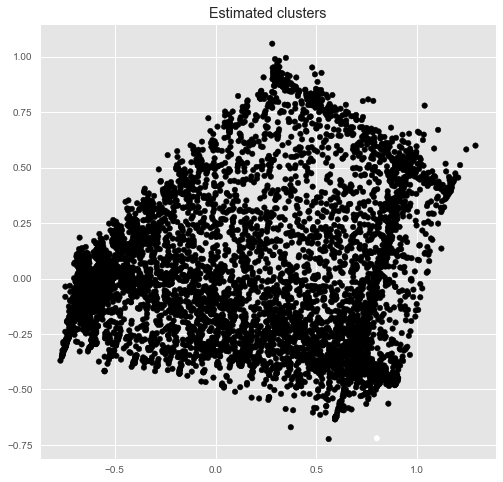

In [48]:
from sklearn.cluster import DBSCAN
def db_SCAN(X):
    epsilon=0.16
    min_samples=15
    loopSearch=[]
    dbscan = DBSCAN(eps=epsilon, metric='euclidean', min_samples=min_samples)
    dbscan.fit(X)
    print(dbscan.labels_)
    silhouette_avg= silhouette_score(X, dbscan.labels_)
    loopSearch.append([epsilon,min_samples,silhouette_avg,dbscan.labels_])
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout()
    print("Estimated clusters for eps=",epsilon,"and min_samples=",min_samples,"that silhouette_avg = ",silhouette_avg)
    s1 = plt.subplot(1, 2, 1)
    s1.set_title("Estimated clusters")
    s1.scatter(X.pca1, X.pca2, c = dbscan.labels_, s = 30)



db_SCAN(pca_df)

In [61]:
pca1= PCA(n_components=3)
principal_comp1 = pca1.fit_transform(df)
principal_comp1
pca_df1 = pd.DataFrame(data=principal_comp1, columns=['pca1','pca2','pca3'])
pca_df1.head()

pca1      pca2      pca3
0 -0.482168 -0.097653 -0.046473
1 -0.608575 -0.019376  0.082109
2  0.304508  0.920934  0.012204
3 -0.588622 -0.005631  0.037055
4 -0.554357  0.052978 -0.084182

In [ ]:



kmean: k is 4 0.5010059988343879


AgglomerativeClustering_Hierarchical number of k is : 2 and silhouette_avg:  0.47526449976845214



gmm: number of cluster is: 2 and the silhouette_avg is:  0.3629871116505642





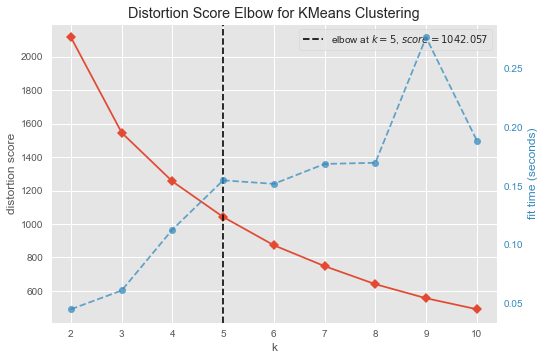

k is 3 0.4979517051990186
k is 4 0.5010059988343879


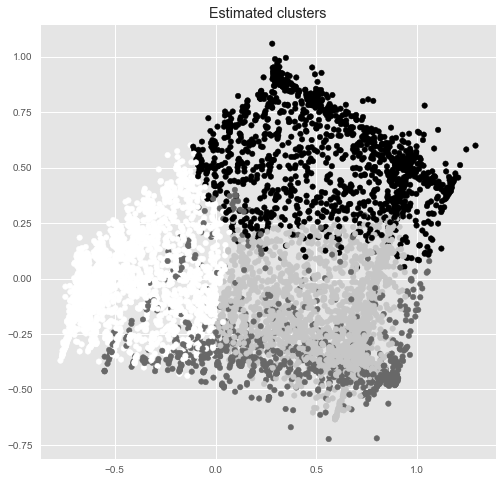

In [86]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df1)
Elbow_M.show()
######################
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df1)
print("k is 3",silhouette_score(pca_df1, kmeans.labels_) )

################################
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df1)
print("k is 4",silhouette_score(pca_df1, kmeans.labels_) )
# #######
fig = plt.figure(figsize=(18, 8))
fig.tight_layout()
s1 = plt.subplot(1, 2, 1)
s1.set_title("Estimated clusters")
s1.scatter(pca_df1.pca1, pca_df1.pca2, c = kmeans.labels_, s = 30)

number of k is : 2 and silhouette_avg:  0.47526449976845214
number of k is : 3 and silhouette_avg:  0.44785802066975117
number of k is : 4 and silhouette_avg:  0.3953515965545401
number of k is : 5 and silhouette_avg:  0.38892219402697487
number of k is : 6 and silhouette_avg:  0.3977891212889741
number of k is : 7 and silhouette_avg:  0.4005374024070032
number of k is : 8 and silhouette_avg:  0.4150248510411642
number of k is : 9 and silhouette_avg:  0.36385038623491806


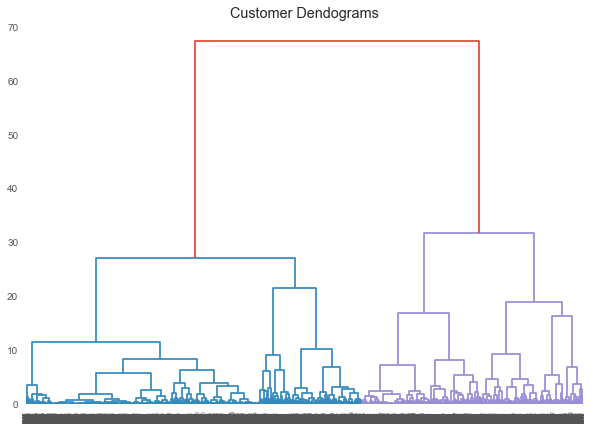

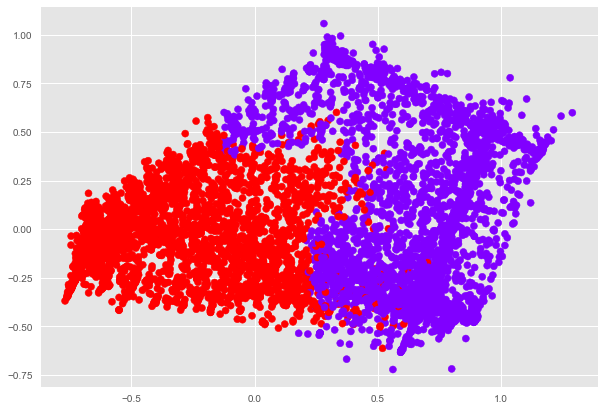

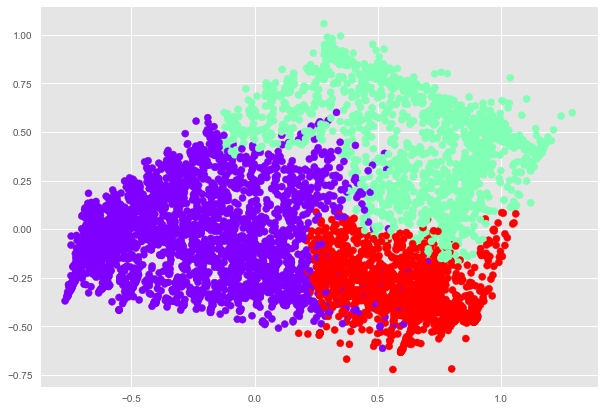

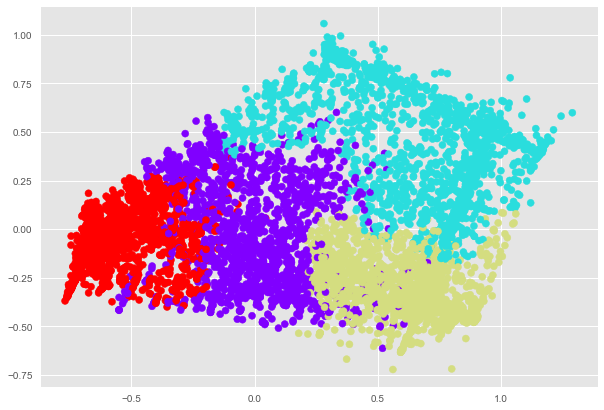

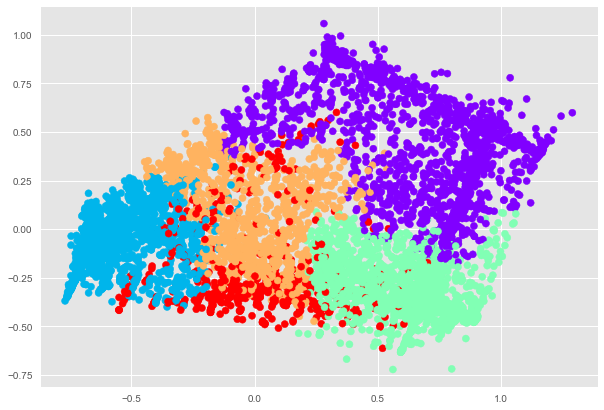

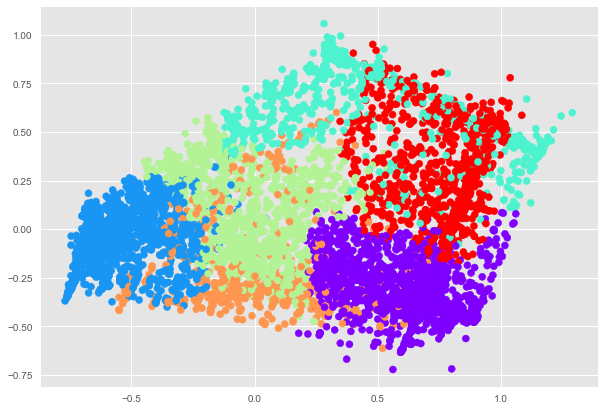

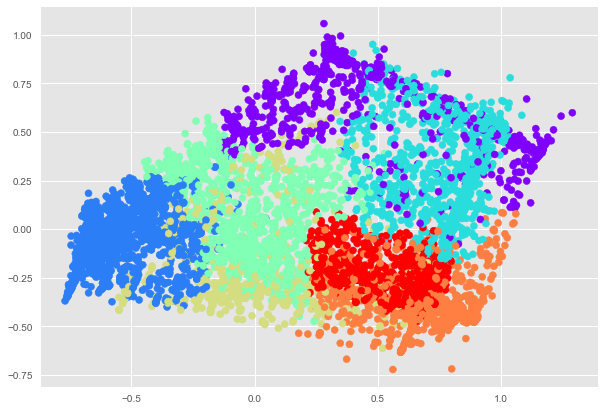

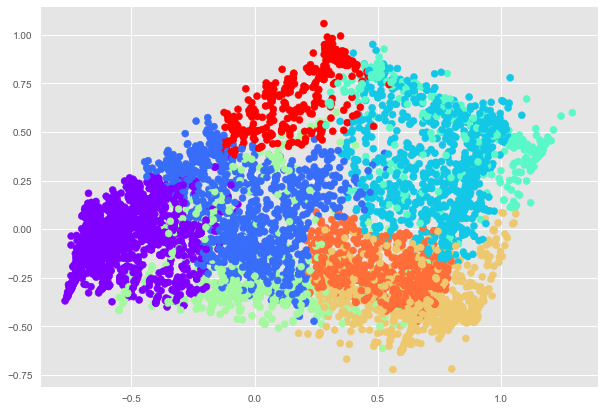

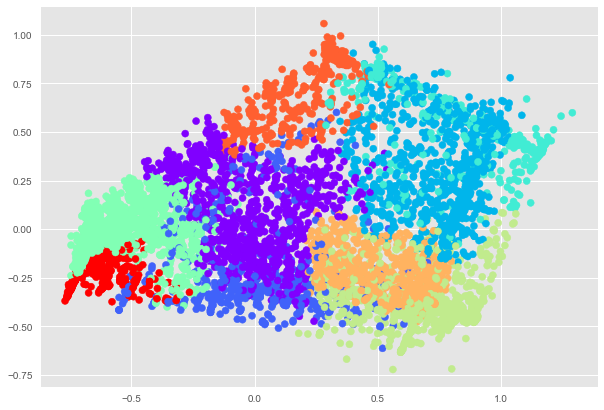

In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering_Hierarchical(X):
    list_silhouette_avg=[]
    plt.figure(figsize=(10, 7))
    plt.title("Customer Dendograms")
    dend = shc.dendrogram(shc.linkage(X, method='ward'))
    for i in range(2,10):
        cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
        cluster.fit_predict(X)
        plt.figure(figsize=(10, 7))
        plt.scatter(X.pca1, X.pca2, c=cluster.labels_, cmap='rainbow')
        
        silhouette_avg = silhouette_score(X, cluster.labels_)
        print("number of k is :",i,"and silhouette_avg: " ,silhouette_avg)
AgglomerativeClustering_Hierarchical(pca_df1)

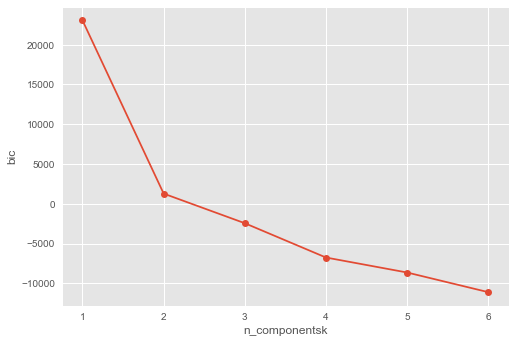

number of cluster is: 2 and the silhouette_avg is:  0.3629871116505642
number of cluster is: 3 and the silhouette_avg is:  0.2897881970188144


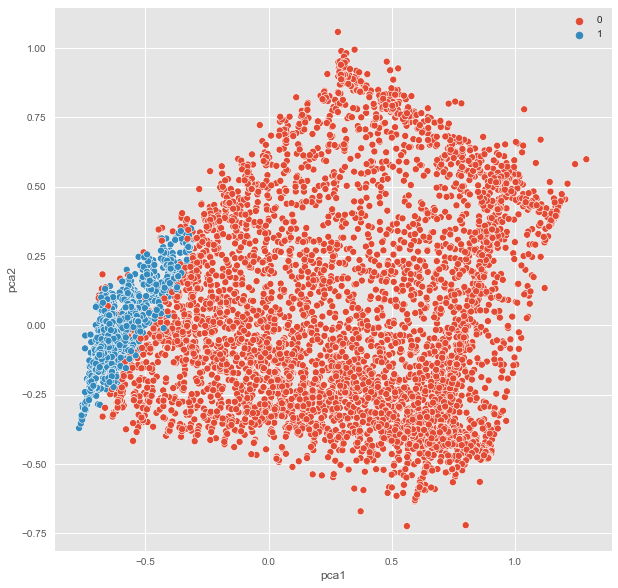

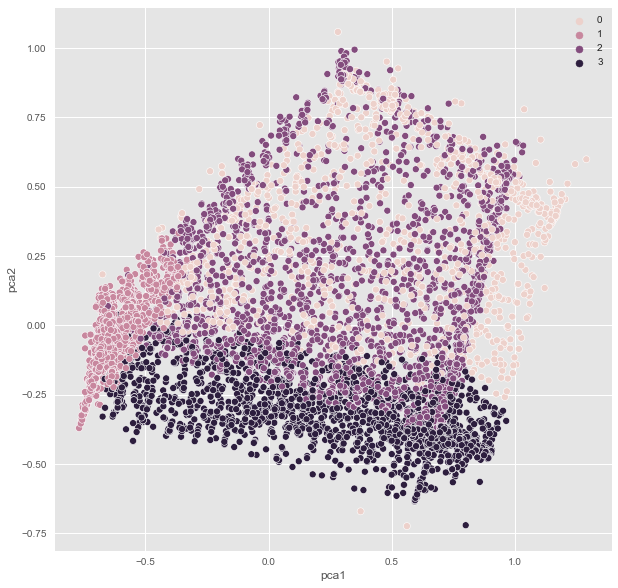

In [88]:
from sklearn.mixture import GaussianMixture
def GMM_c(X):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", random_state=0)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
    plt.plot(n_components_range, bic, marker = "o")
    plt.xlabel("n_componentsk")
    plt.ylabel("bic")
    plt.show()
    
GMM_c(pca_df1)

gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=0)
gmm.fit(pca_df1)
gmmlabel=gmm.predict(pca_df1)
silhouette_avg= silhouette_score(pca_df1, gmmlabel)
print("number of cluster is:",2,"and the silhouette_avg is: ",silhouette_avg)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = gmmlabel, data = pca_df1)

#######################################################
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=0)
gmm.fit(pca_df1)
gmmlabel=gmm.predict(pca_df1)
silhouette_avg= silhouette_score(pca_df1, gmmlabel)
print("number of cluster is:",3,"and the silhouette_avg is: ",silhouette_avg)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = gmmlabel, data = pca_df1)


[0 0 0 ... 0 0 0]
Estimated clusters for eps= 0.12 and min_samples= 5 that silhouette_avg =  -0.1676930246751986


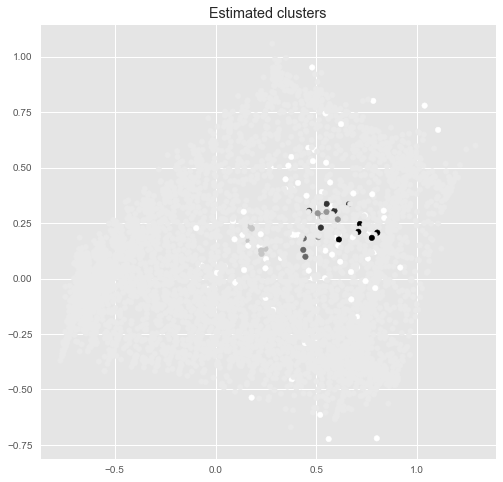

In [89]:
from sklearn.cluster import DBSCAN
def db_SCAN(X):
    epsilon=0.12
    min_samples=5
    loopSearch=[]
    dbscan = DBSCAN(eps=epsilon, metric='euclidean', min_samples=min_samples)
    dbscan.fit(X)
    print(dbscan.labels_)
    silhouette_avg= silhouette_score(X, dbscan.labels_)
    loopSearch.append([epsilon,min_samples,silhouette_avg,dbscan.labels_])
    fig = plt.figure(figsize=(18, 8))
    fig.tight_layout()
    print("Estimated clusters for eps=",epsilon,"and min_samples=",min_samples,"that silhouette_avg = ",silhouette_avg)
    s1 = plt.subplot(1, 2, 1)
    s1.set_title("Estimated clusters")
    s1.scatter(X.pca1, X.pca2, c = dbscan.labels_, s = 30)



db_SCAN(pca_df1)